## Crop Recommendation System

In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
from pathlib import Path


In [4]:
%pwd

'c:\\Users\\tarak\\OneDrive\\Documents\\Workspace\\Cropq\\Crop Recommendation System\\Notebooks'

In [5]:
os.chdir('../')

In [6]:
%pwd

'c:\\Users\\tarak\\OneDrive\\Documents\\Workspace\\Cropq\\Crop Recommendation System'

#### Import Dataset

In [7]:
df = pd.read_csv('Data/crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [8]:
df.sample(5)

N    P    K  temperature   humidity        ph    rainfall       label
5      69   37   42    23.058049  83.370118  7.073454  251.055000        rice
1684    7   17   10    10.164313  91.223210  6.465913  106.362551      orange
1964  119   44   15    22.145937  82.859755  7.091992   60.653817      cotton
475    20   72   15    36.004158  56.013344  7.313517  134.859647  pigeonpeas
1552   28  123  198    23.462603  91.456650  5.682751  111.776340       apple

In [9]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [12]:
df.describe().T

count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117

In [13]:
# Shape of the data
df.shape

(2200, 8)

In [14]:
# Columns in the data
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [15]:
# Checking for missing values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [16]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [17]:
# Checking for unique values in each column
def unique_values(df):
    for i in df.columns:
        print(i, df[i].nunique())

unique_values(df)

N 137
P 117
K 73
temperature 2200
humidity 2200
ph 2200
rainfall 2200
label 22


In [18]:
# Checking for unique values in each column using lambda function
unique_values = pd.DataFrame(df.apply(lambda x: x.nunique(), axis=0), columns=['Unique Values']).sort_values(by='Unique Values', ascending=False)
unique_values

Unique Values
temperature           2200
rainfall              2200
ph                    2200
humidity              2200
N                      137
P                      117
K                       73
label                   22

In [19]:
# Checking for the distribution of the target variable
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

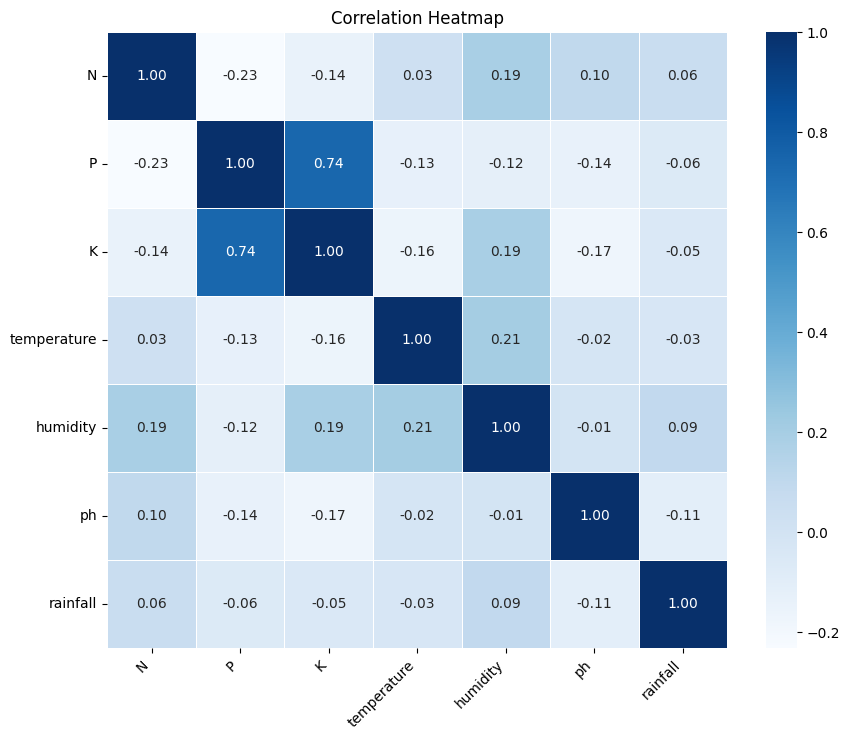

In [ ]:
# Heat map for correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'label' column and calculate the correlation matrix
correlation = df.drop('label', axis=1)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation.corr(), annot=True, cmap='Blues', fmt='.2f', annot_kws={'size': 10}, linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Exploratory Data Analysis

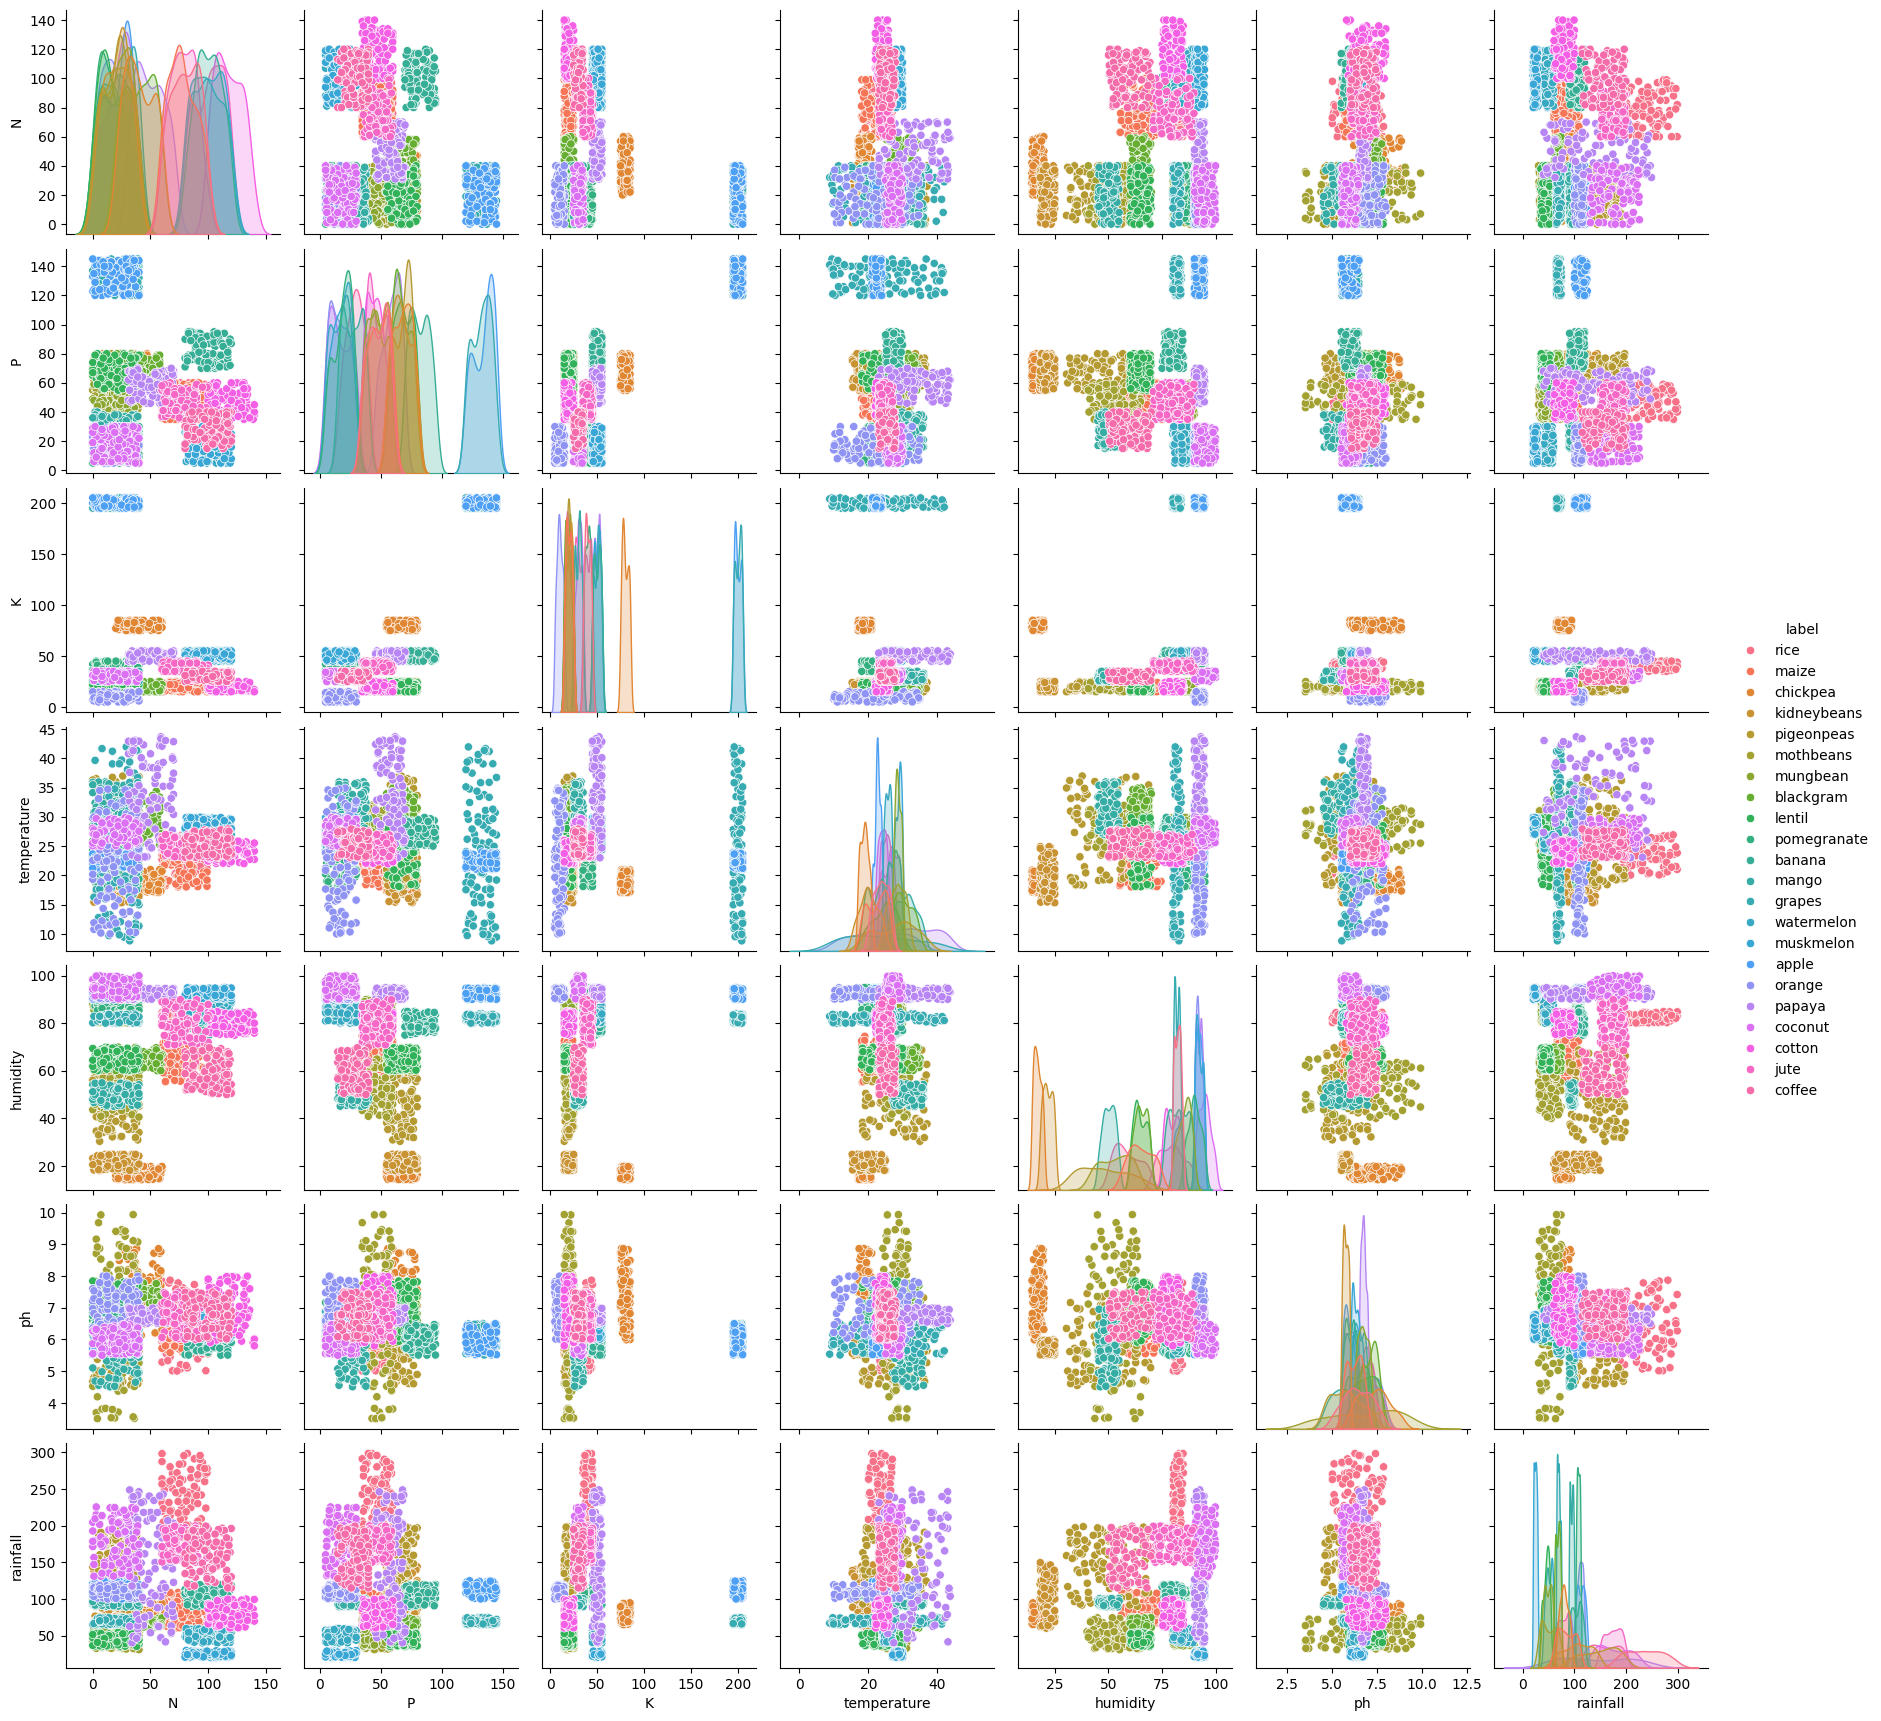

In [21]:
# Pairplot
sns.pairplot(df, hue='label', palette='husl')
plt.show()

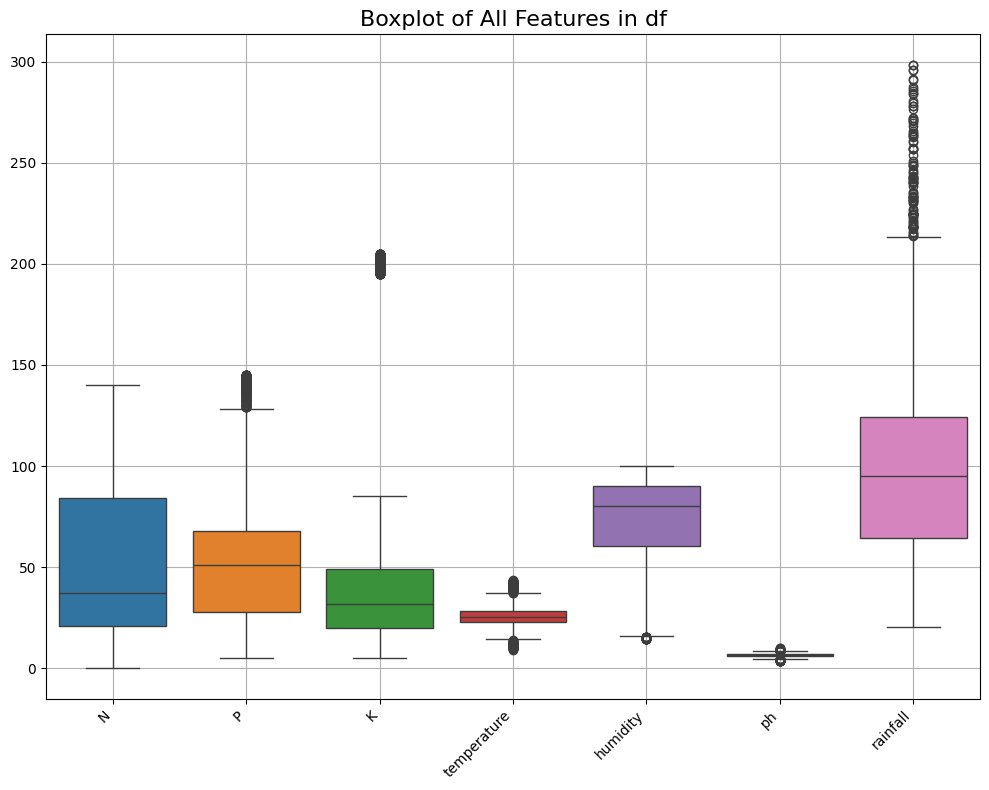

In [ ]:
# Boxplot of all features

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.boxplot(data=df)

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')
plt.title("Boxplot of All Features in df", fontsize=16)
plt.grid(True)
plt.tight_layout()  
plt.show()


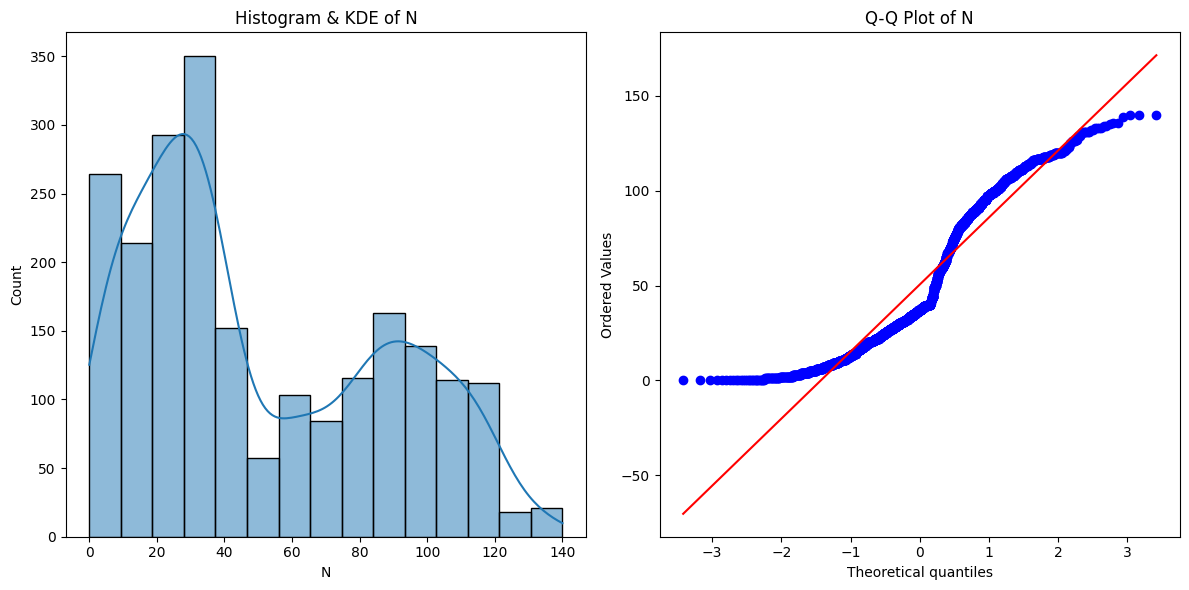

Shapiro-Wilk Test for N: p-value = 0.0000
N is not normally distributed.



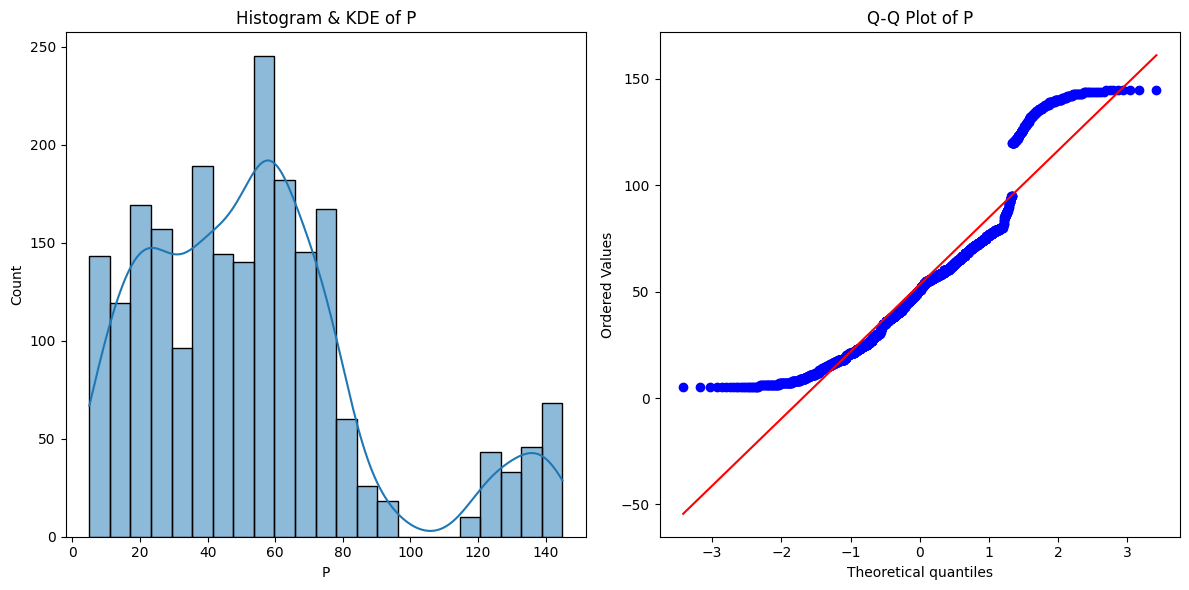

Shapiro-Wilk Test for P: p-value = 0.0000
P is not normally distributed.



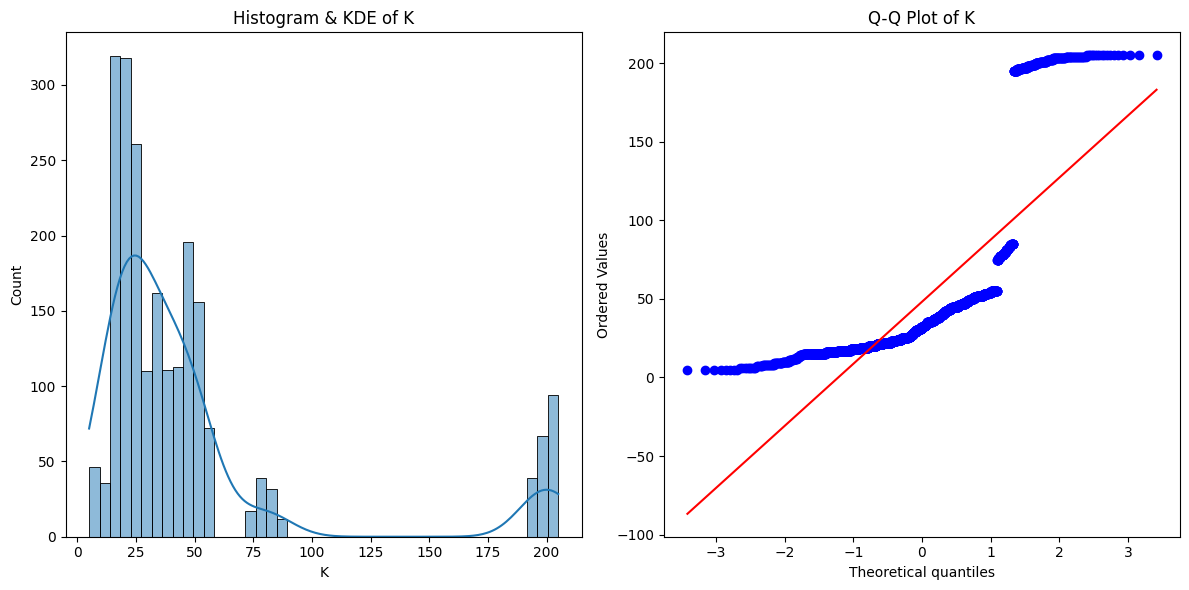

Shapiro-Wilk Test for K: p-value = 0.0000
K is not normally distributed.



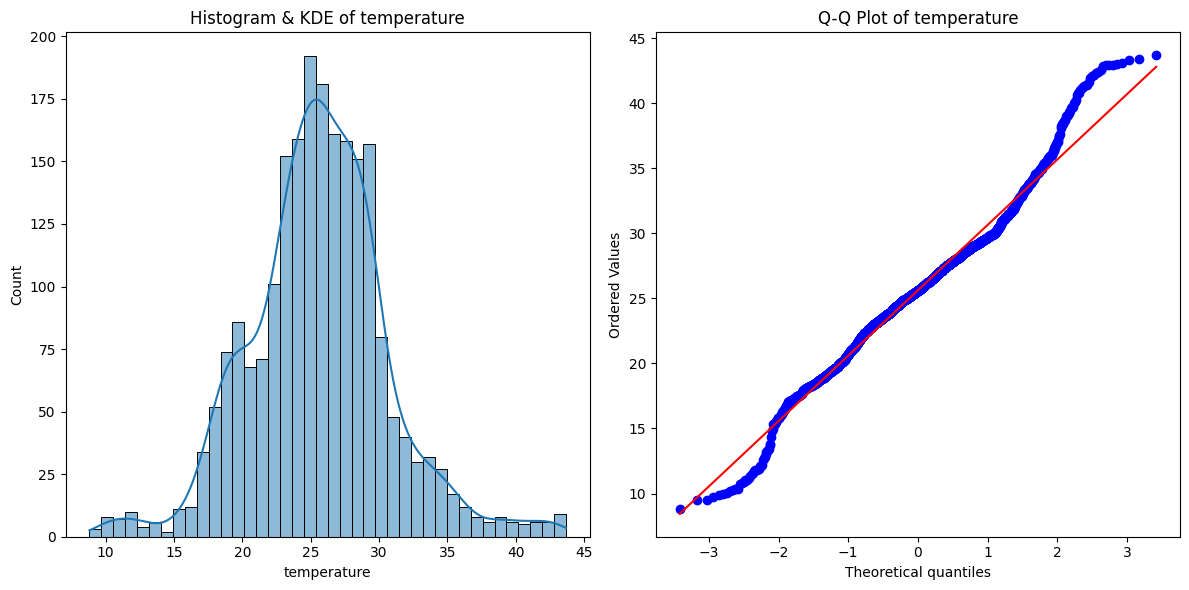

Shapiro-Wilk Test for temperature: p-value = 0.0000
temperature is not normally distributed.



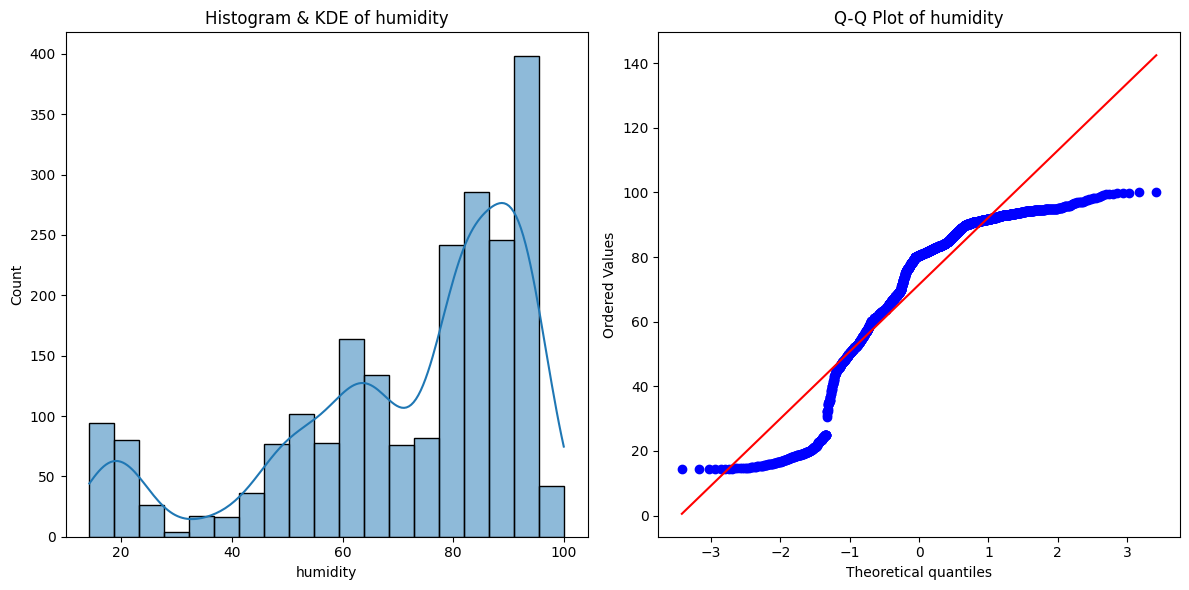

Shapiro-Wilk Test for humidity: p-value = 0.0000
humidity is not normally distributed.



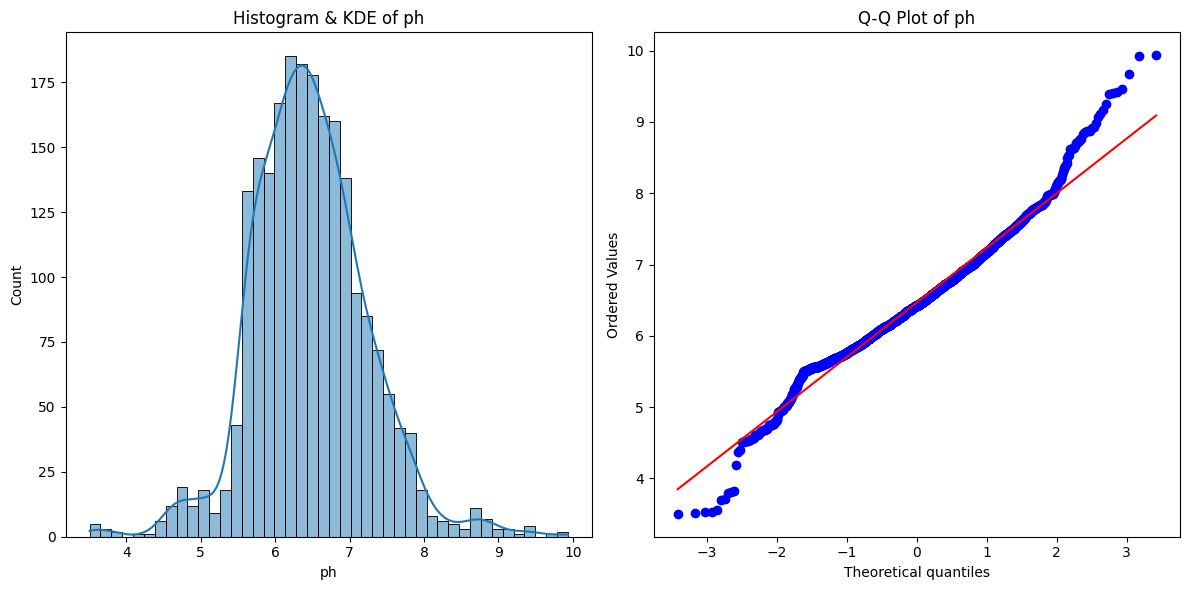

Shapiro-Wilk Test for ph: p-value = 0.0000
ph is not normally distributed.



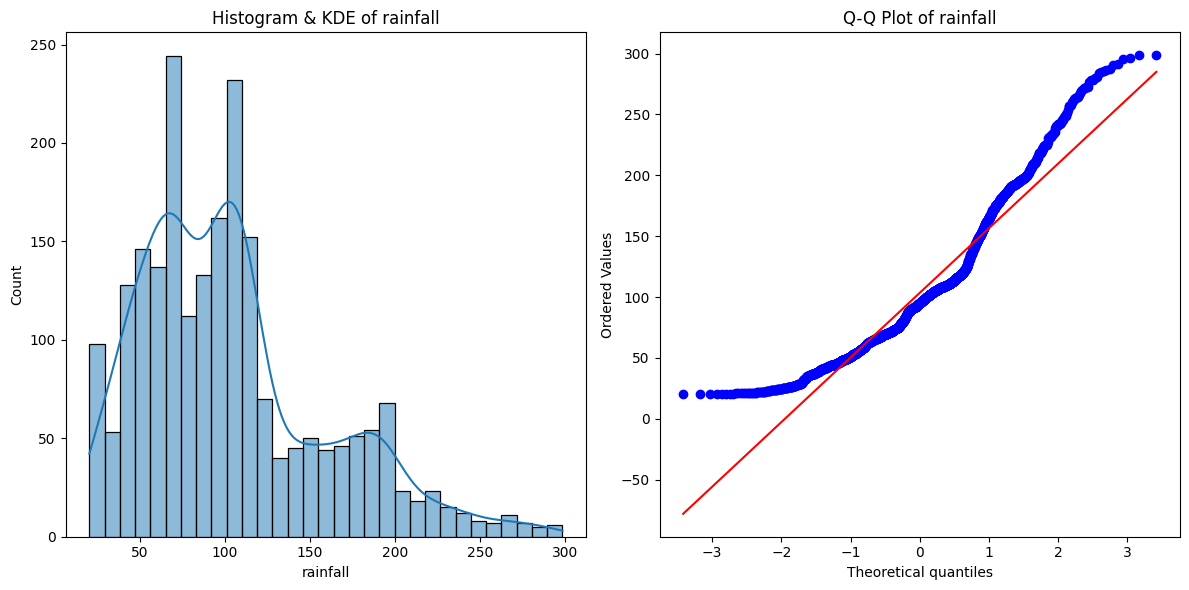

Shapiro-Wilk Test for rainfall: p-value = 0.0000
rainfall is not normally distributed.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Identify numerical columns in the dataframe (both continuous and discrete)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Separate continuous and discrete features
# Continuous features: Let's assume continuous features are those with more than 10 unique values
continuous_features = [col for col in numerical_cols if df[col].nunique() > 10]
discrete_features = [col for col in numerical_cols if df[col].nunique() <= 10]

# Function to visualize and test normality
def check_normality(df, features):
    for feature in features:
        plt.figure(figsize=(12, 6))

        # Plot histogram and KDE (Kernel Density Estimate)
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True)
        plt.title(f'Histogram & KDE of {feature}')
        
        # Plot Q-Q plot
        plt.subplot(1, 2, 2)
        stats.probplot(df[feature], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {feature}')
        
        plt.tight_layout()
        plt.show()

        # Perform the Shapiro-Wilk Test (p-value < 0.05 suggests non-normality)
        stat, p_value = stats.shapiro(df[feature].dropna())
        # print(f"Shapiro-Wilk Test for {feature}: p-value = {p_value:.4f}")
        if p_value < 0.05:
            print(f"{feature} is not normally distributed.\n")
        else:
            print(f"{feature} is normally distributed.\n")

# Visualize and test normality for continuous features
check_normality(df, continuous_features)

for feature in discrete_features:
    plt.figure(figsize=(10, 8))
    sns.countplot(x=df[feature])
    plt.title(f'Countplot of {feature}')
    plt.show()


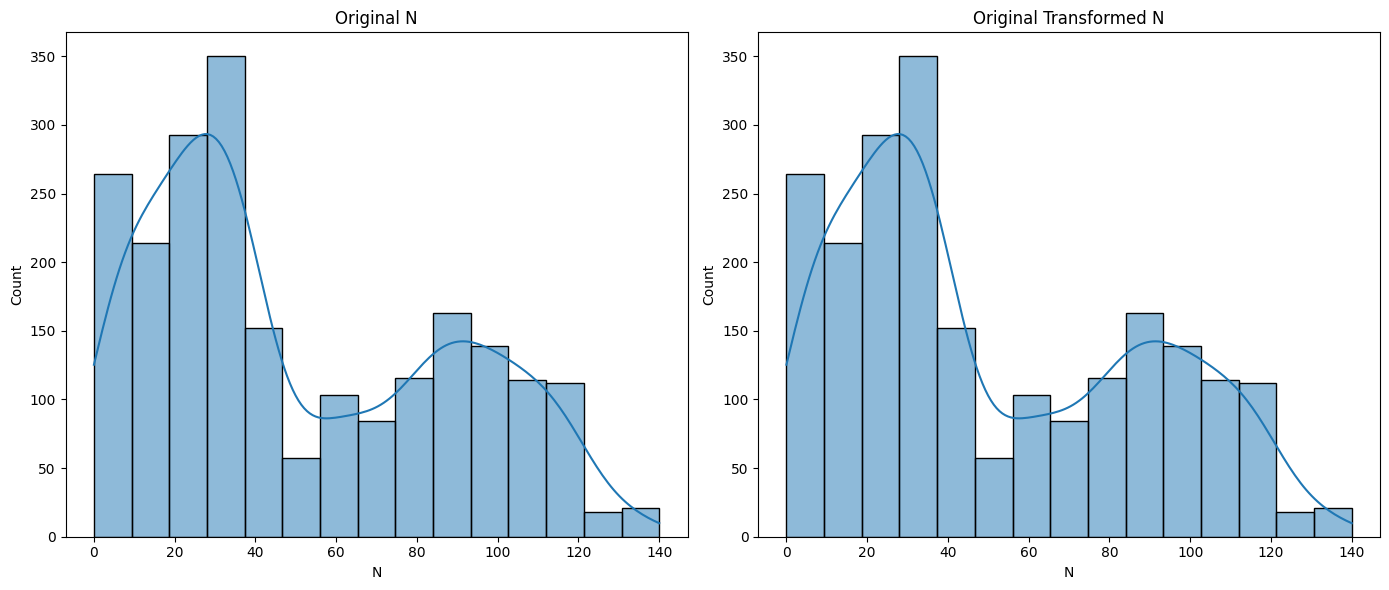

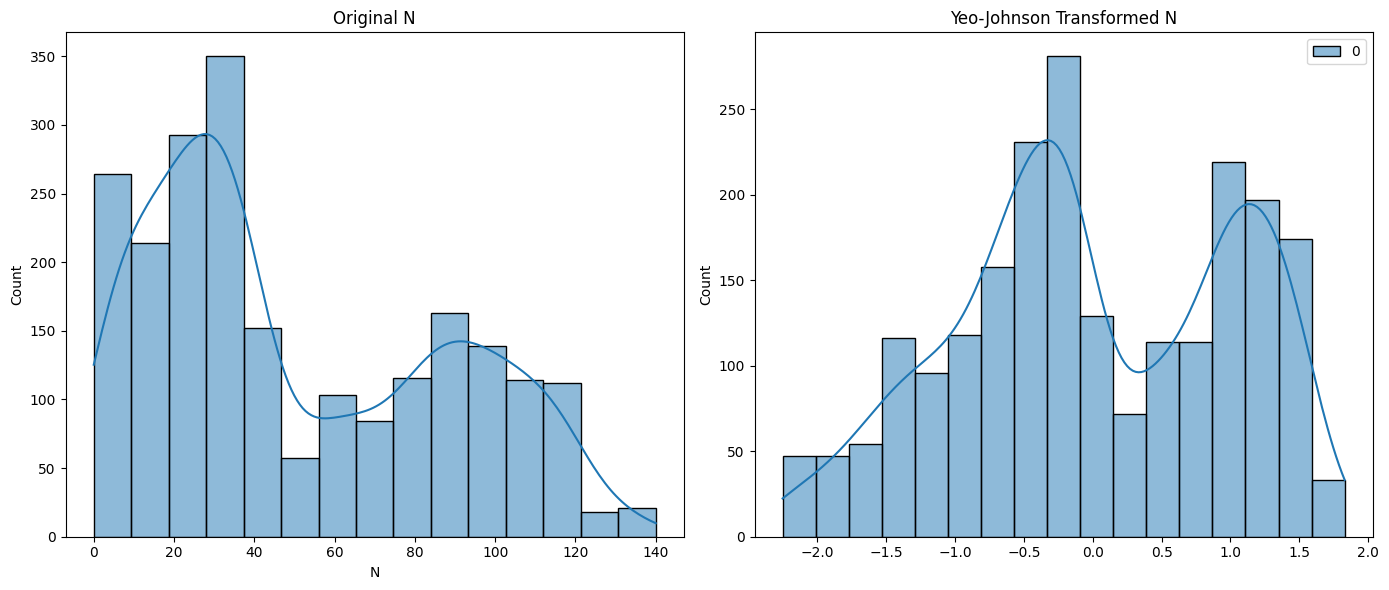

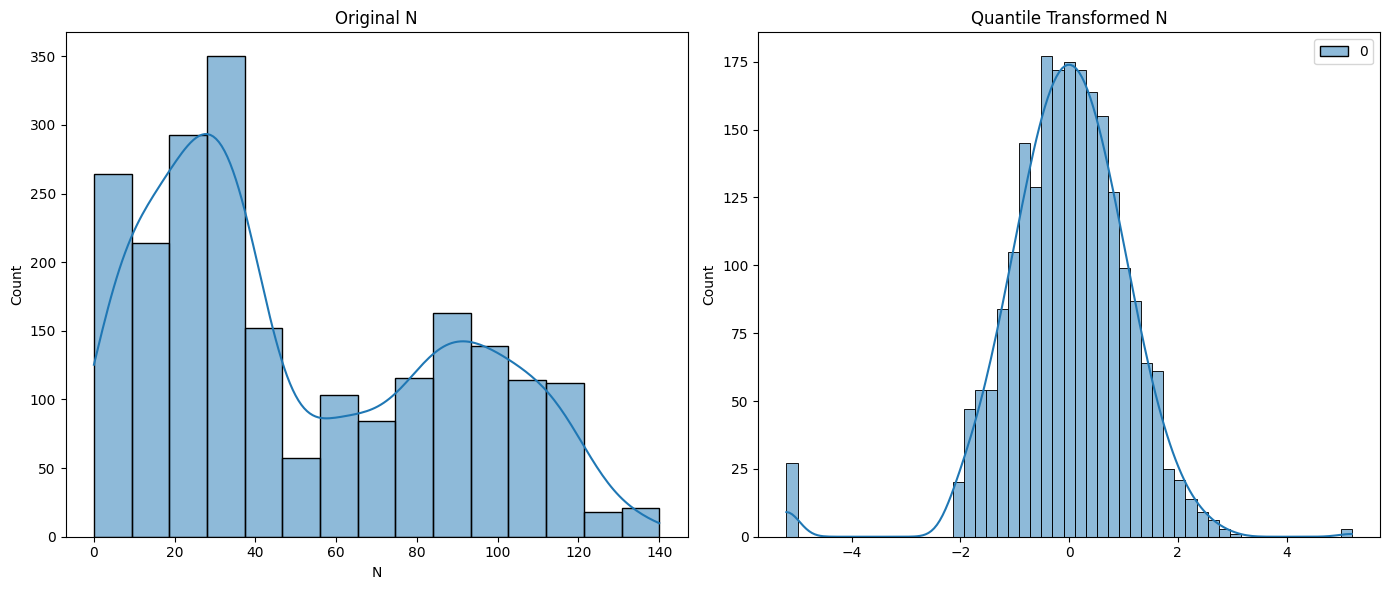

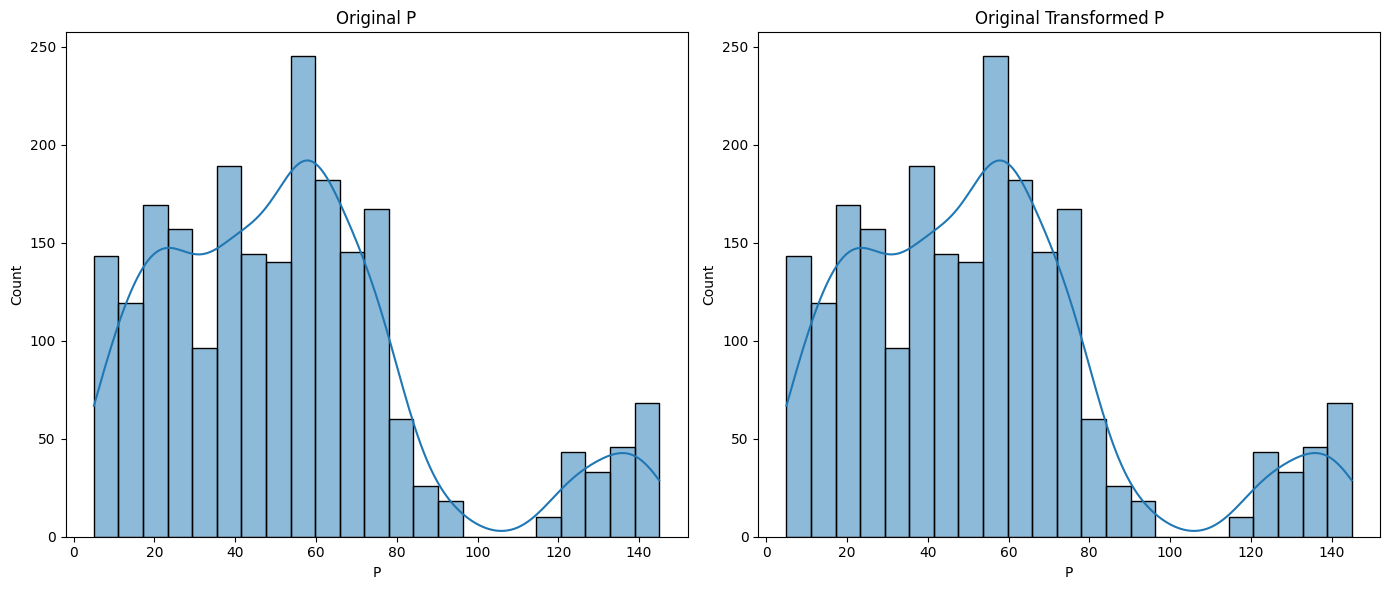

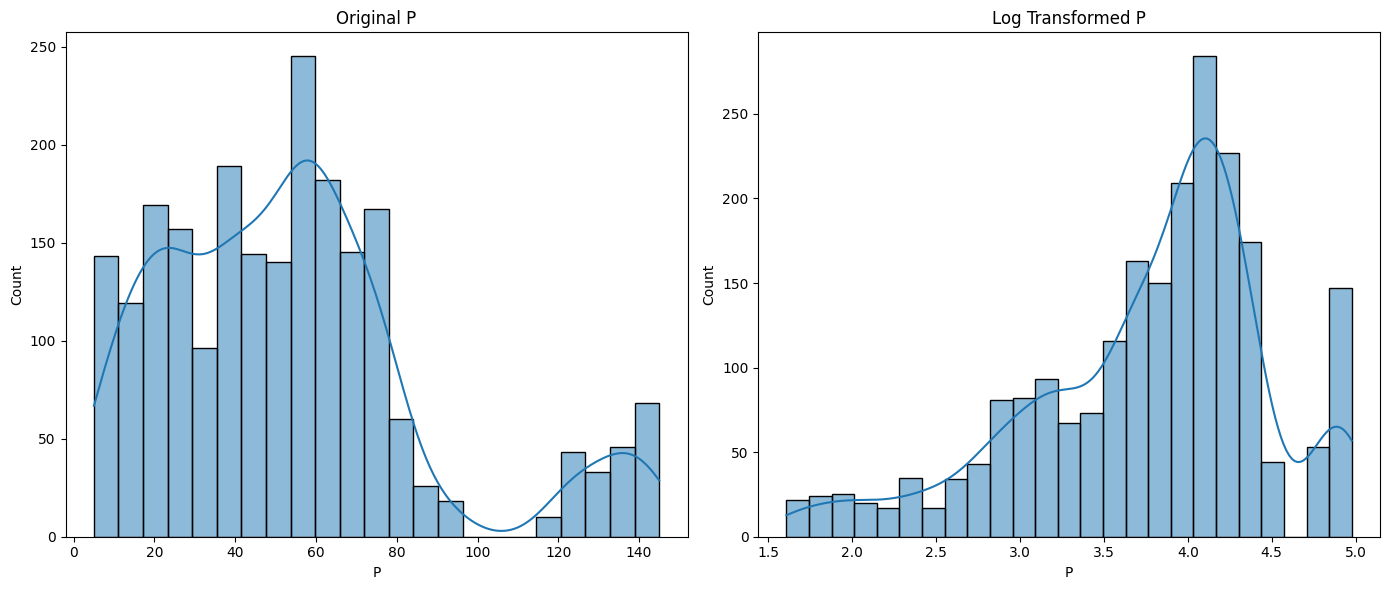

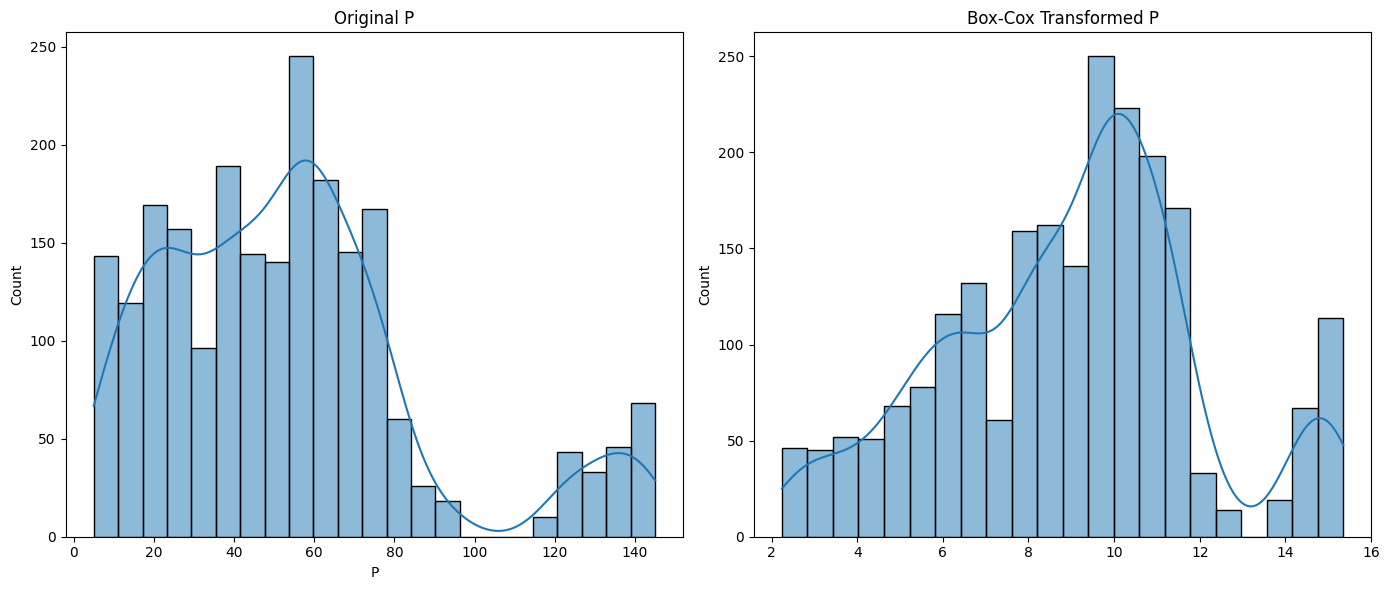

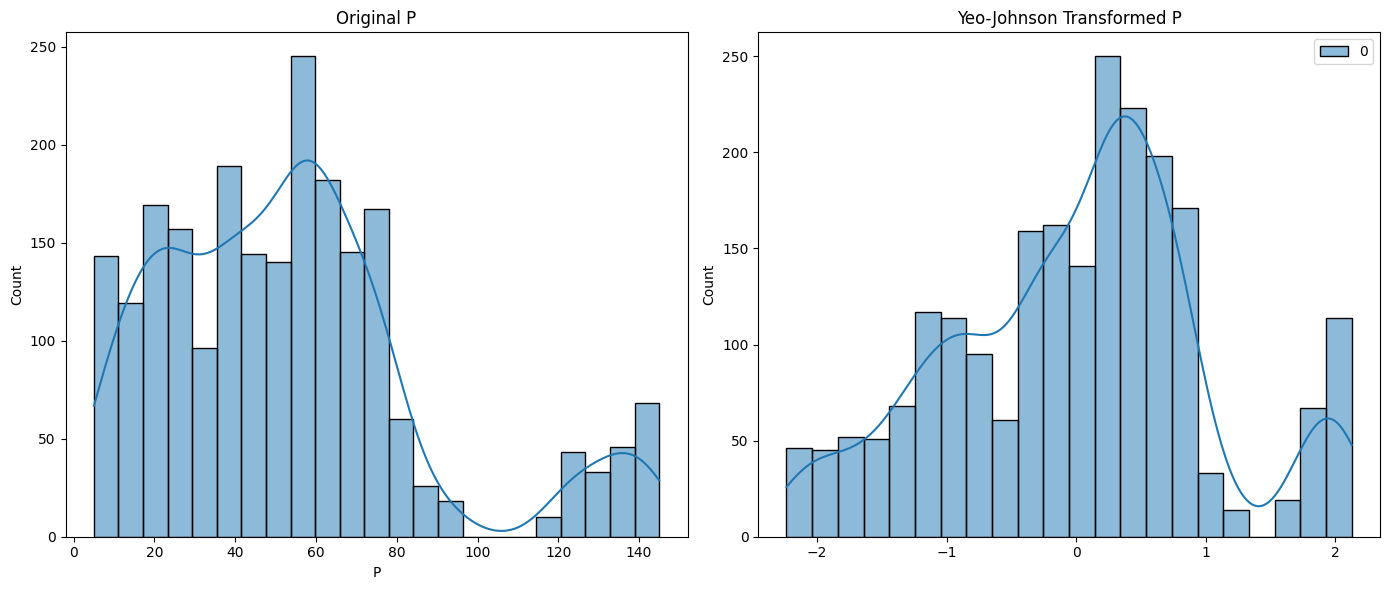

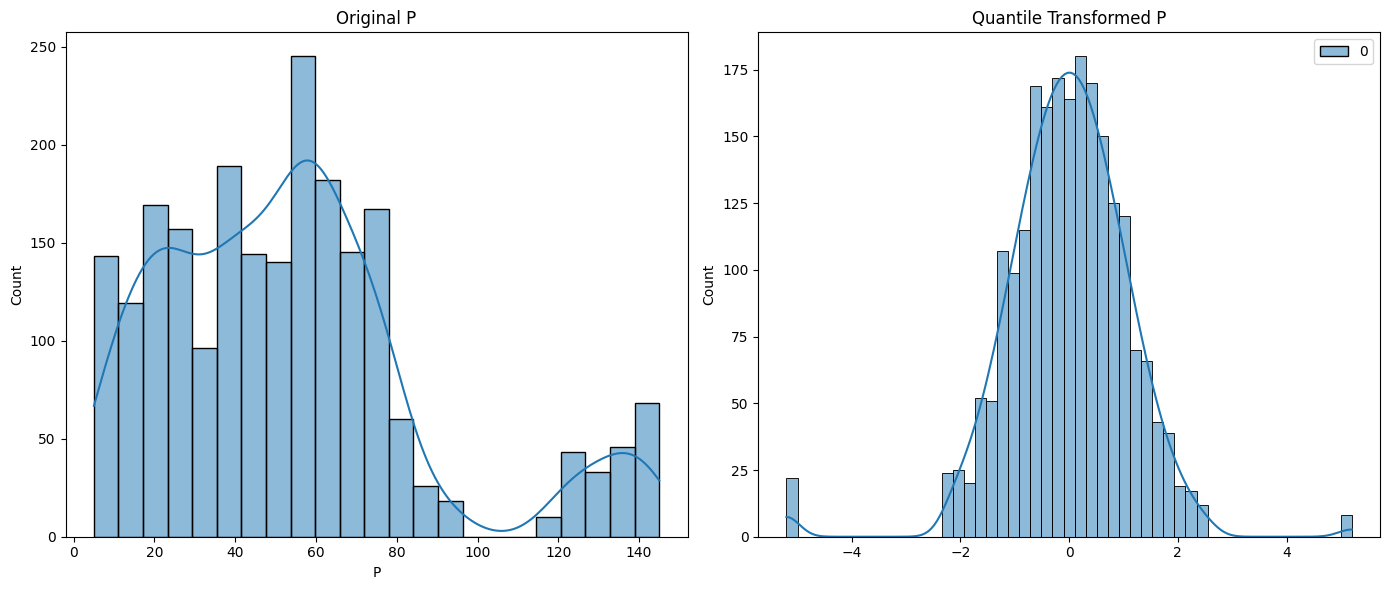

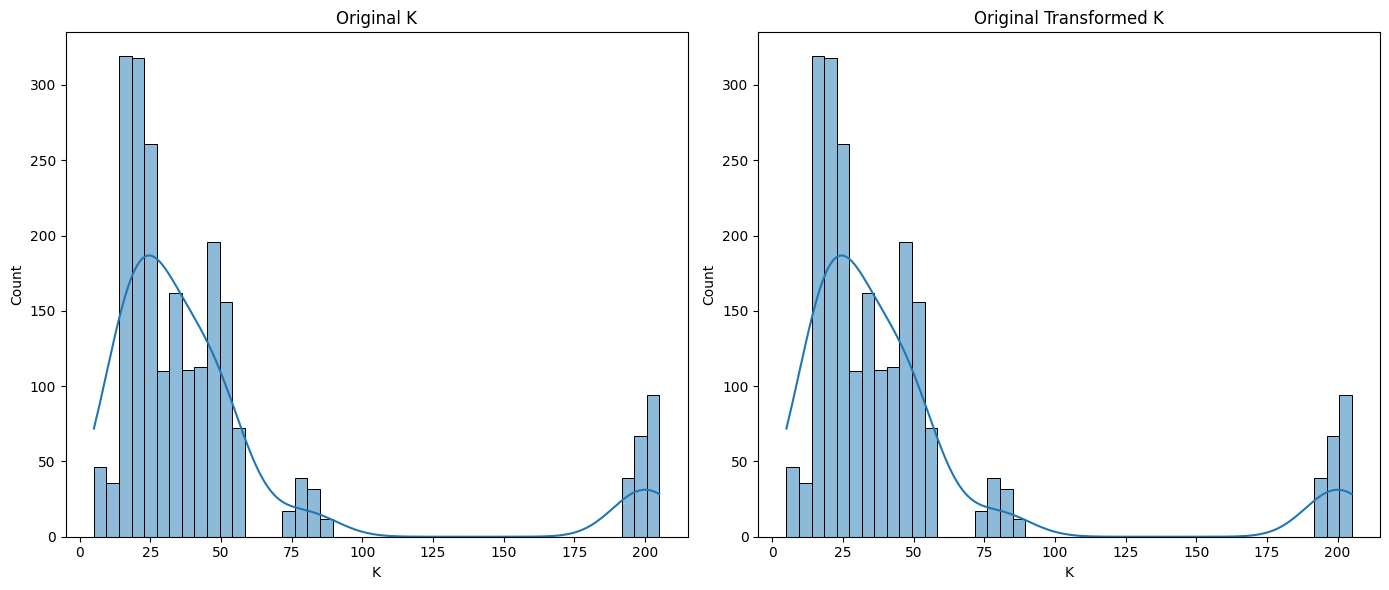

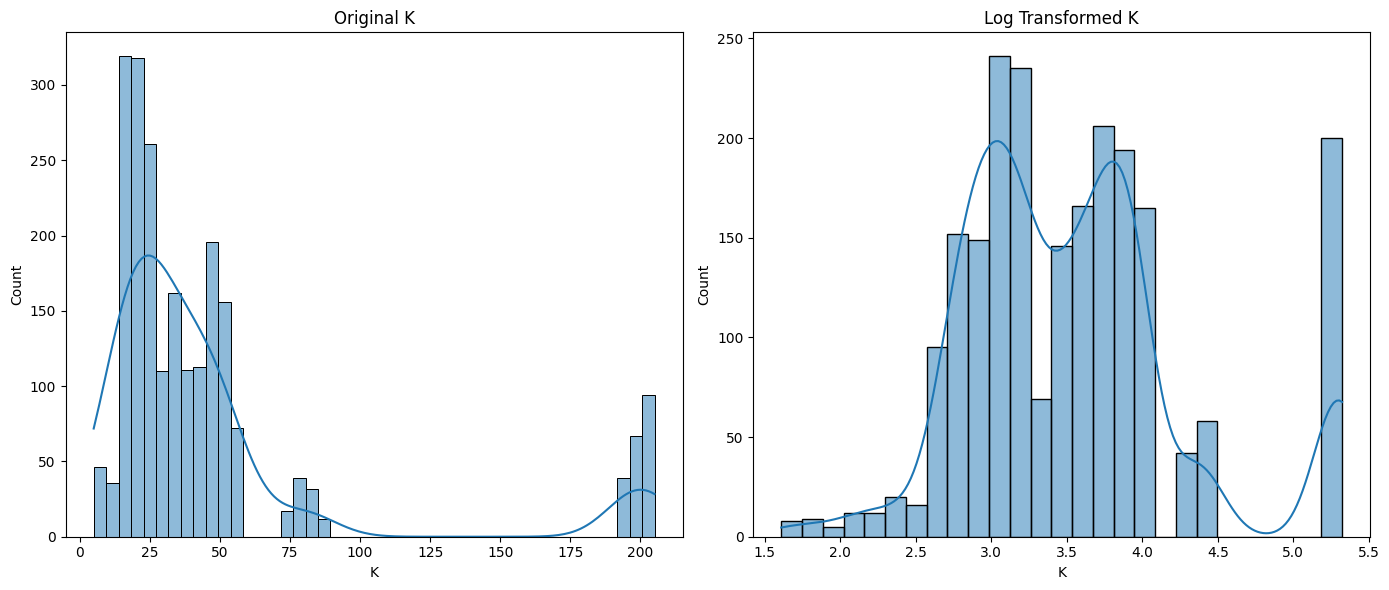

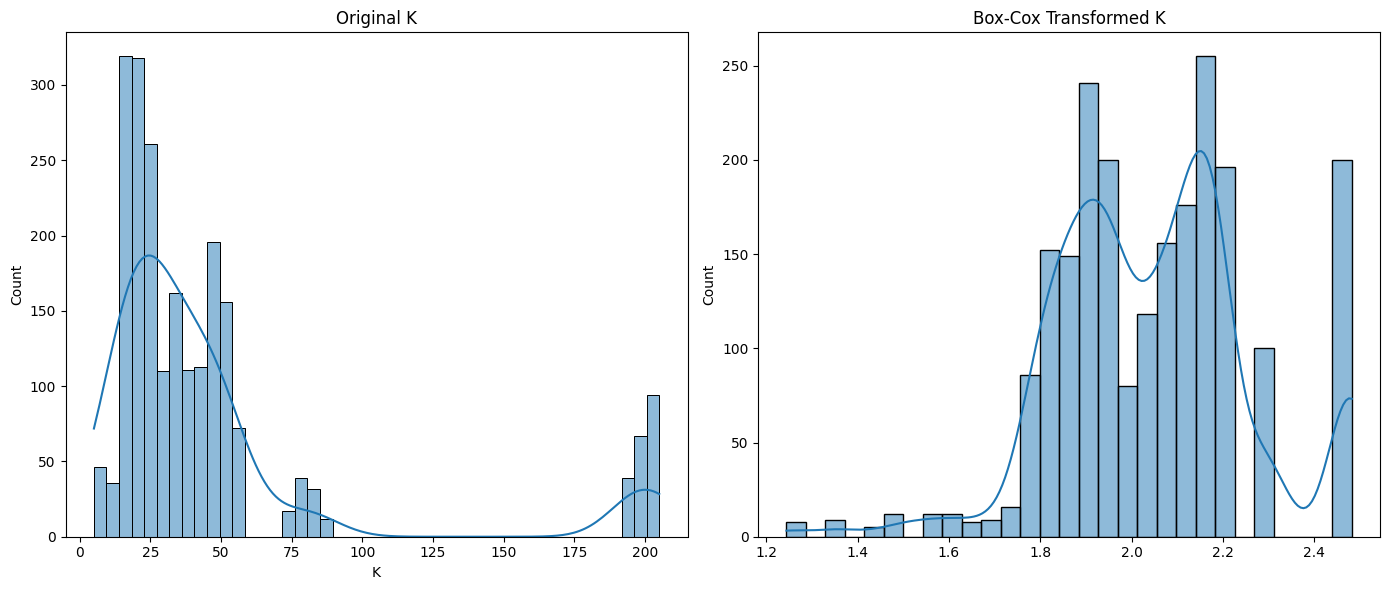

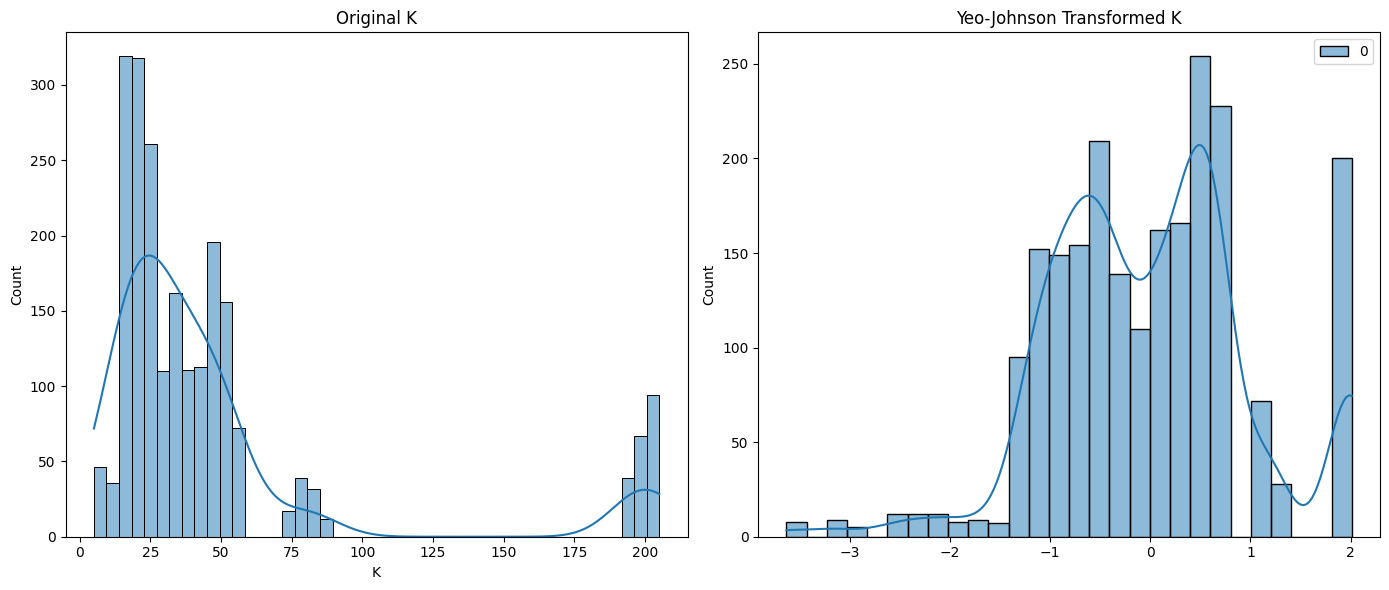

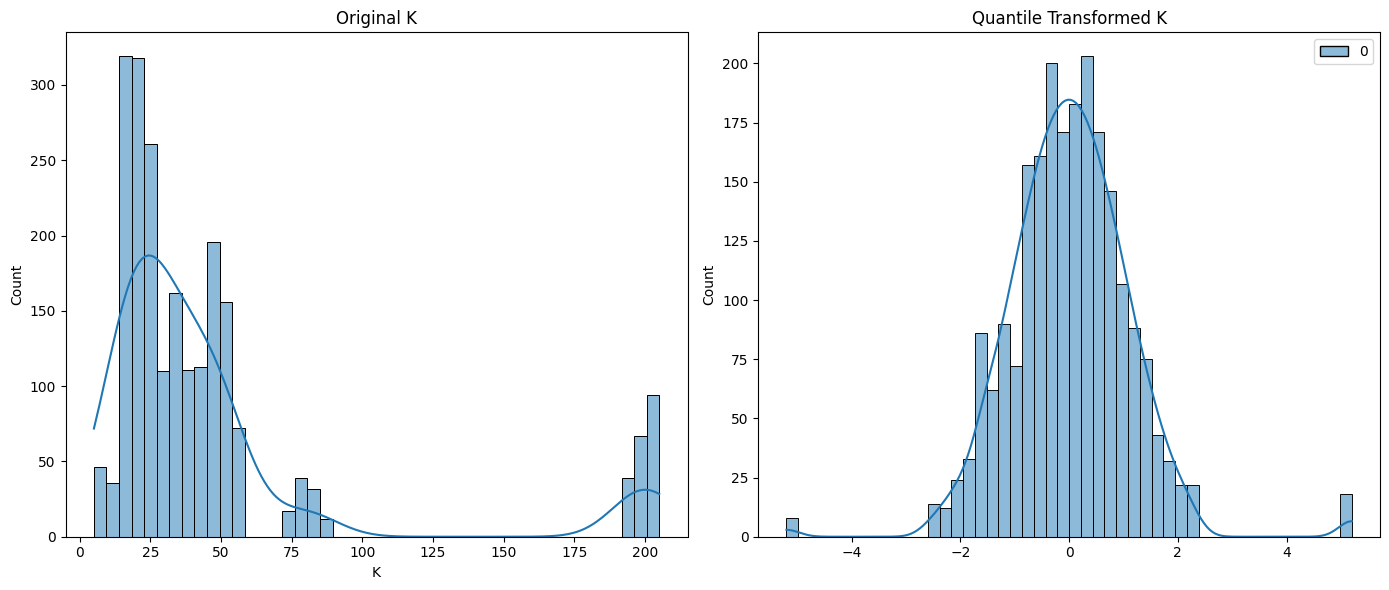

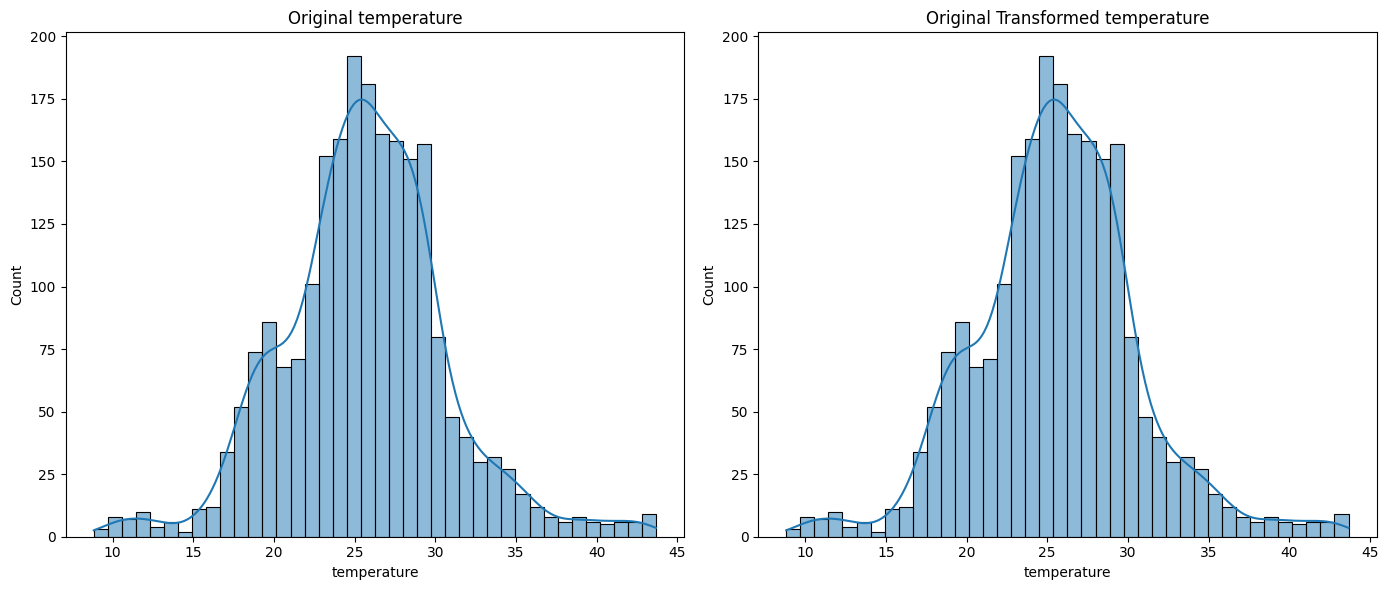

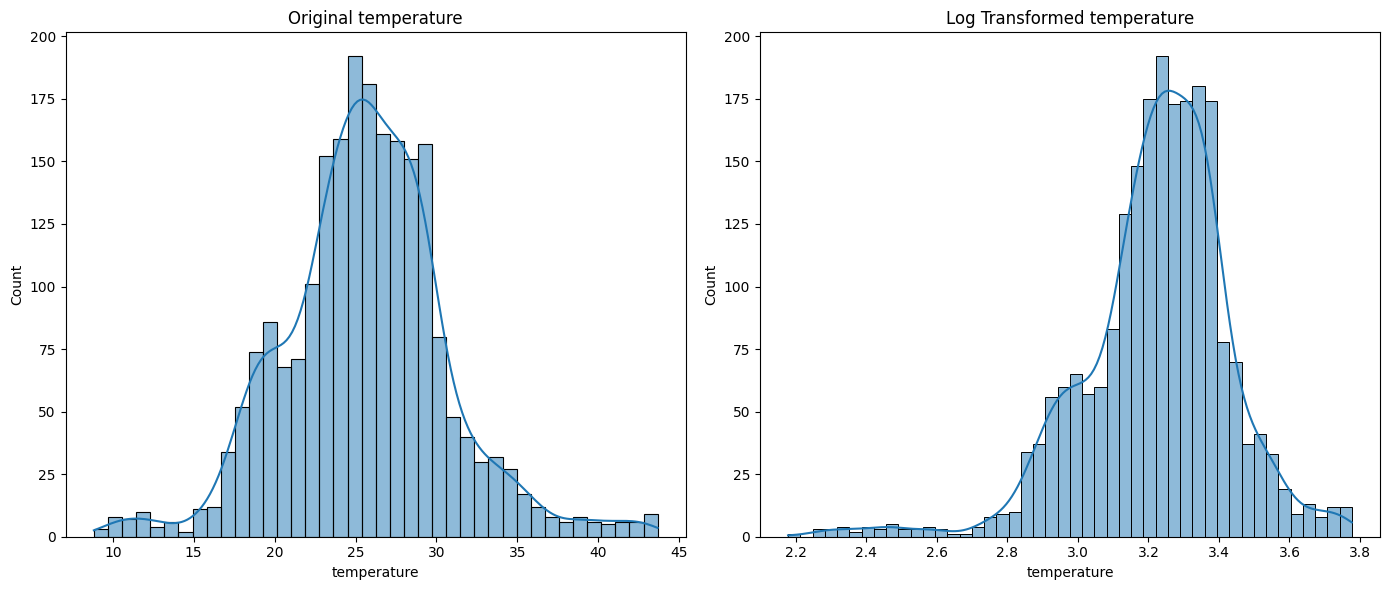

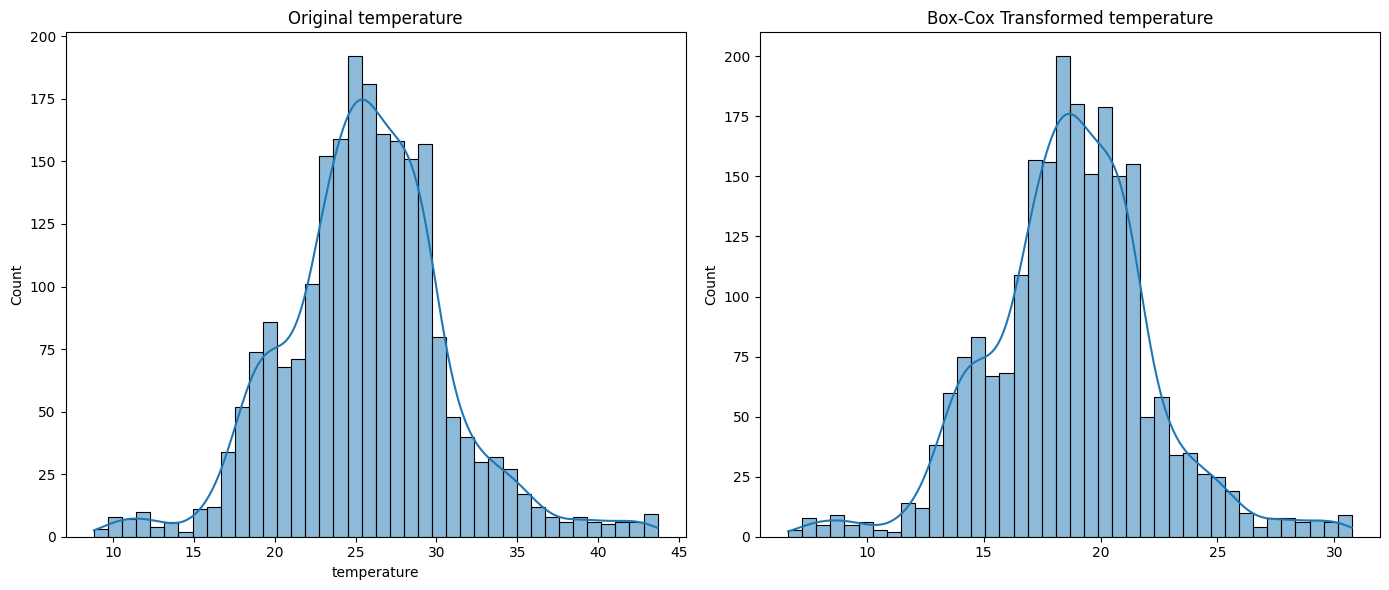

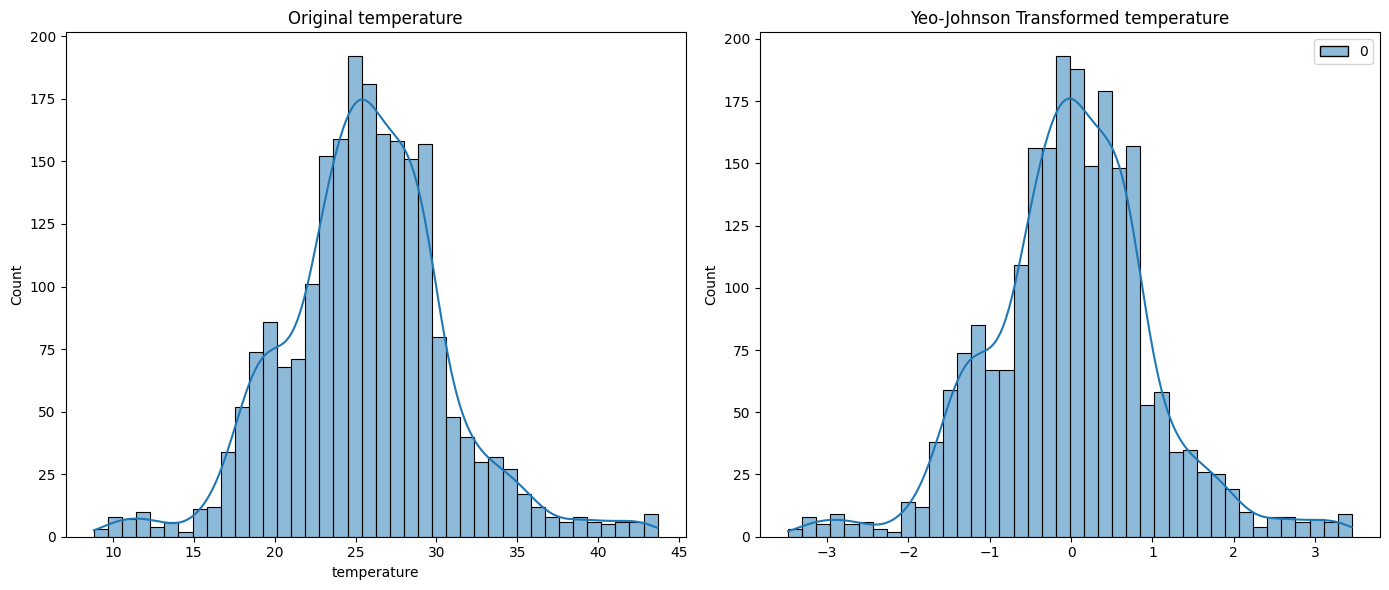

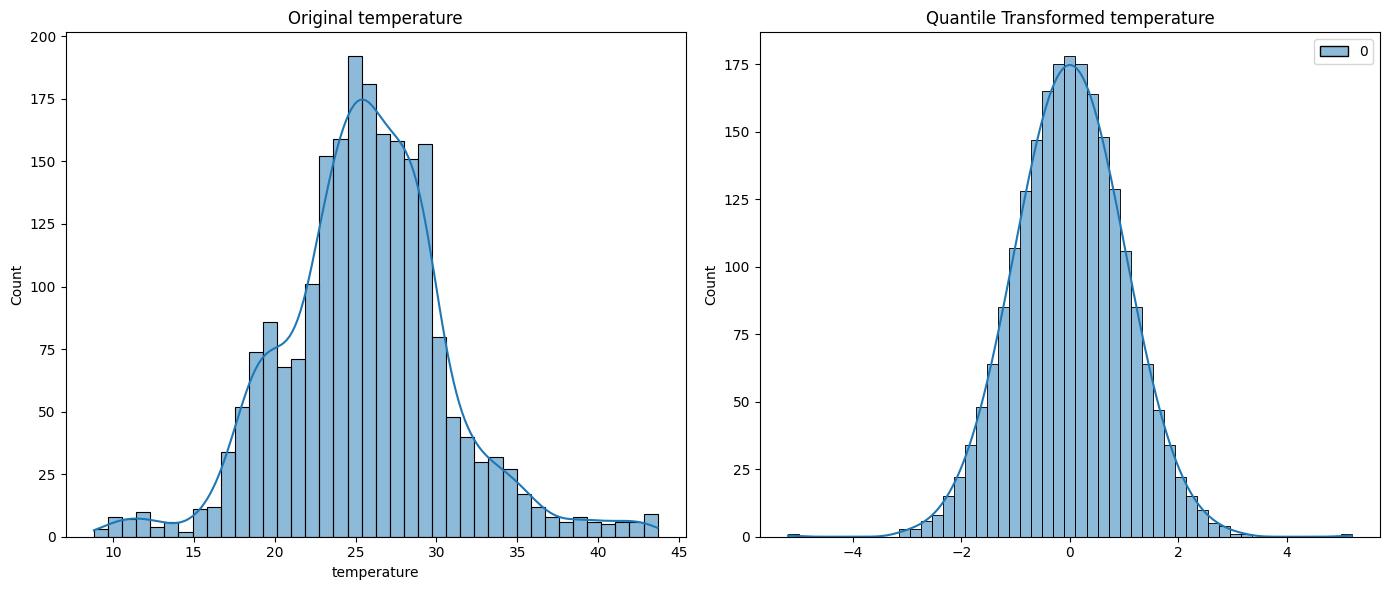

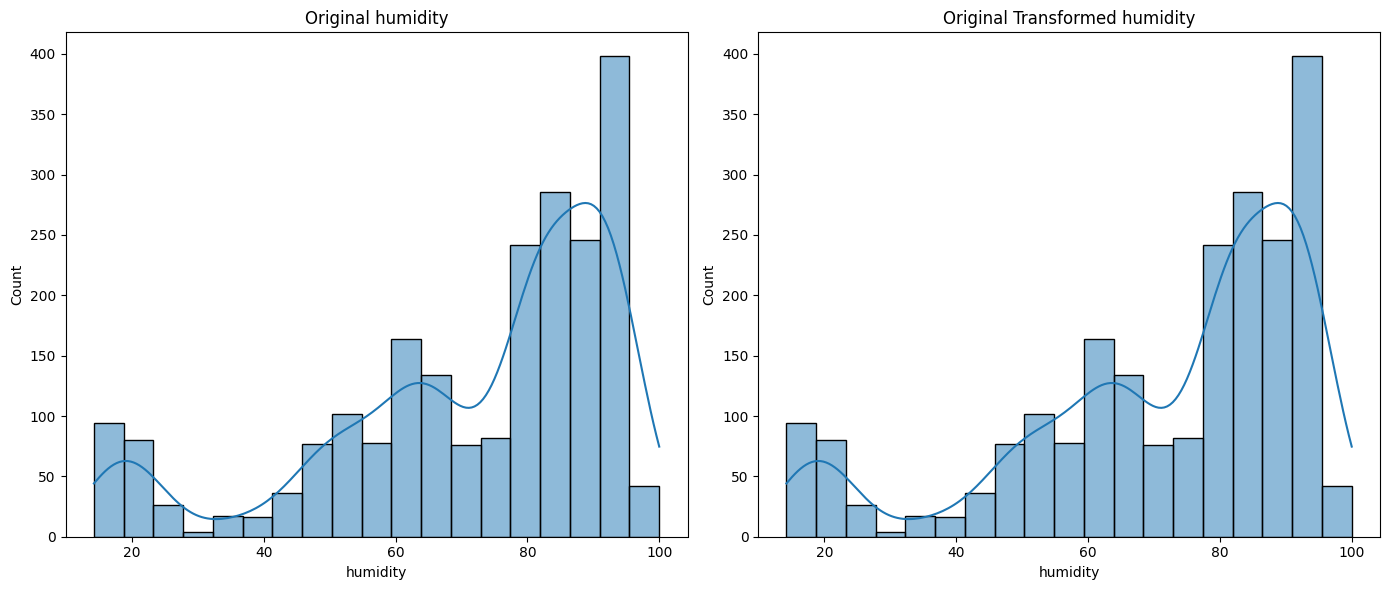

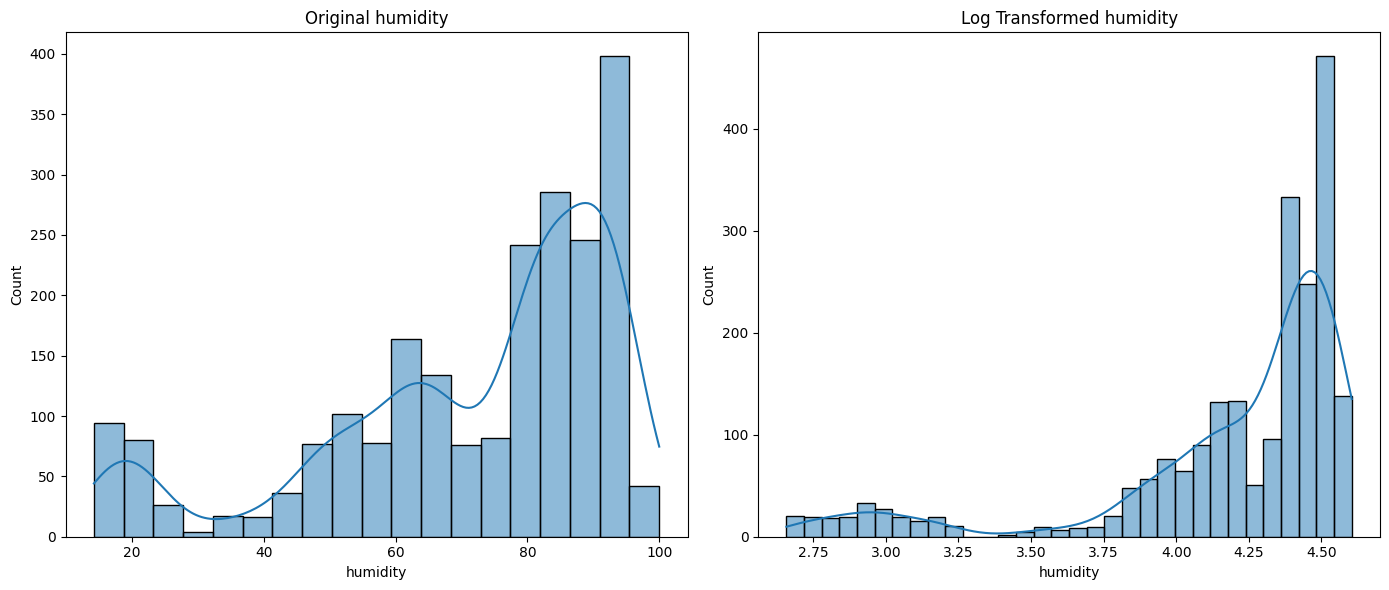

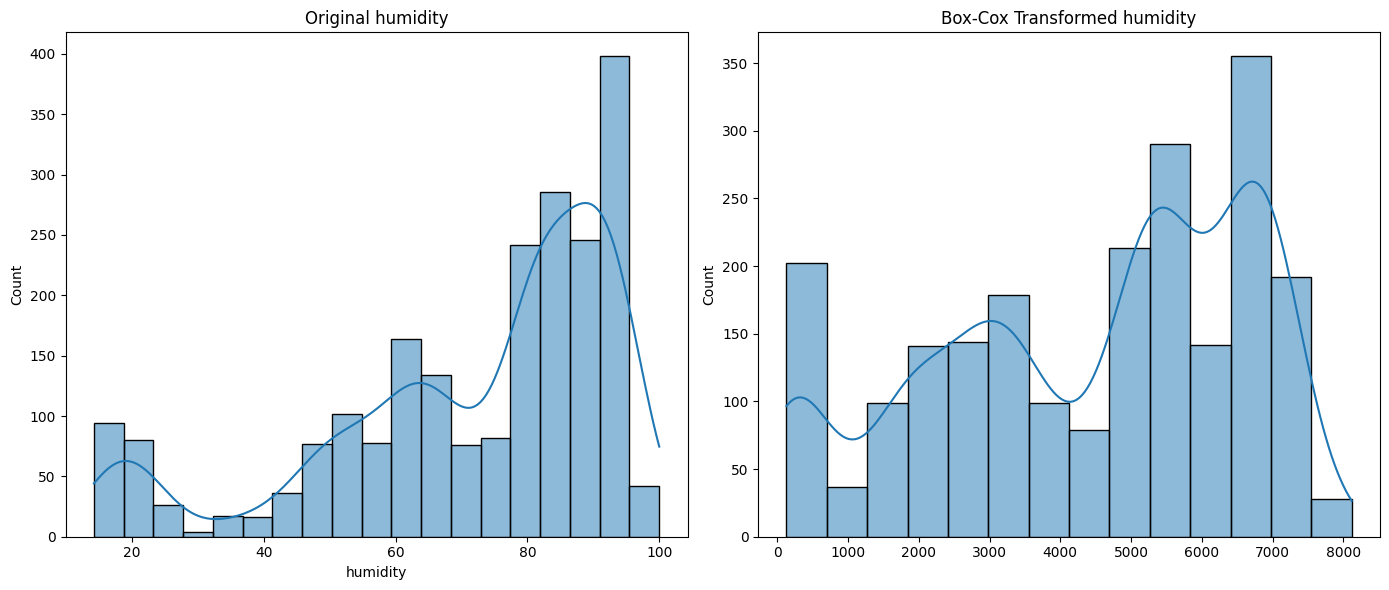

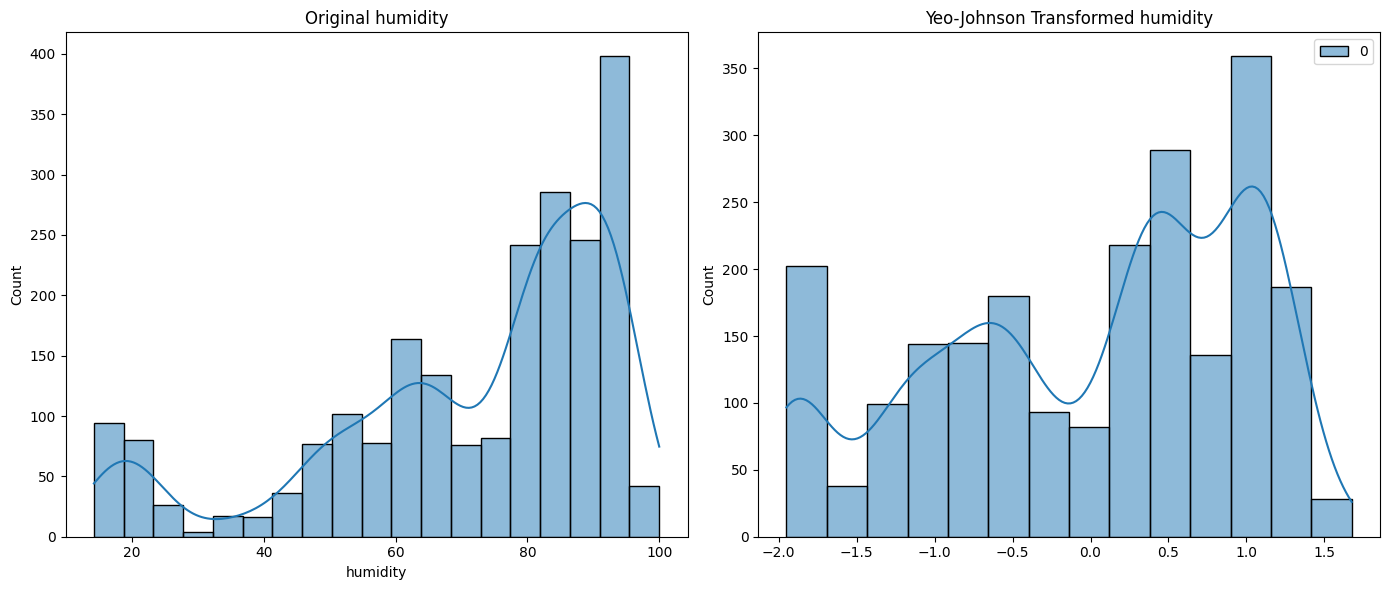

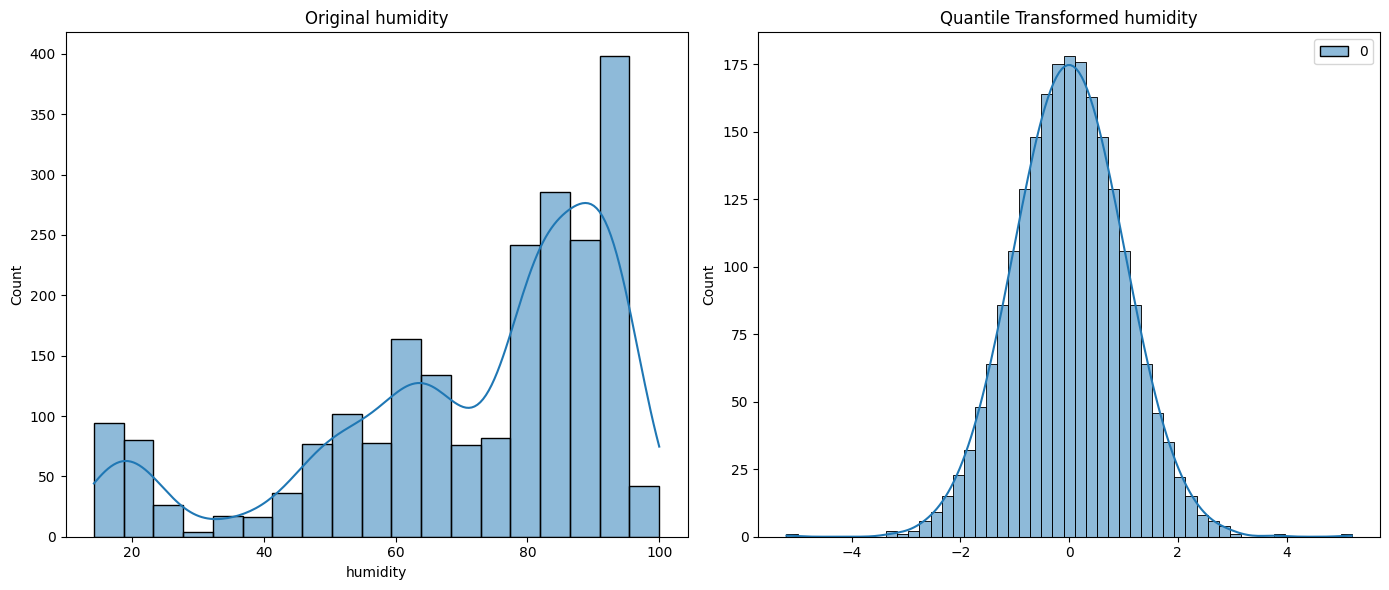

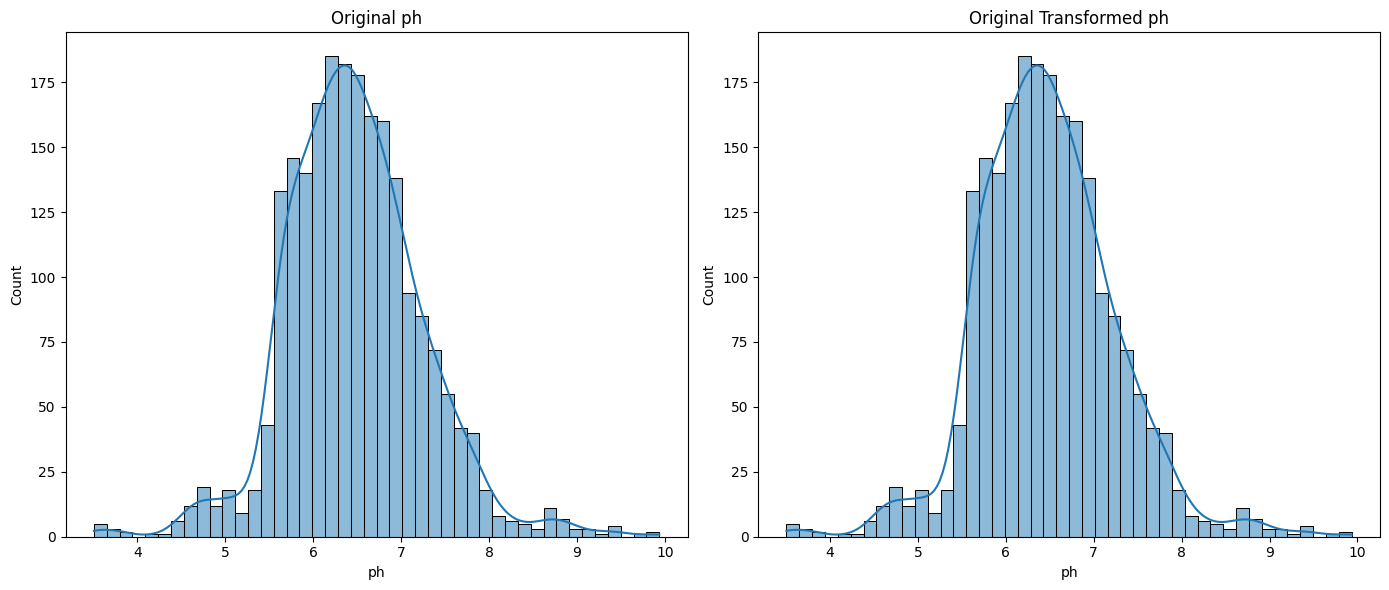

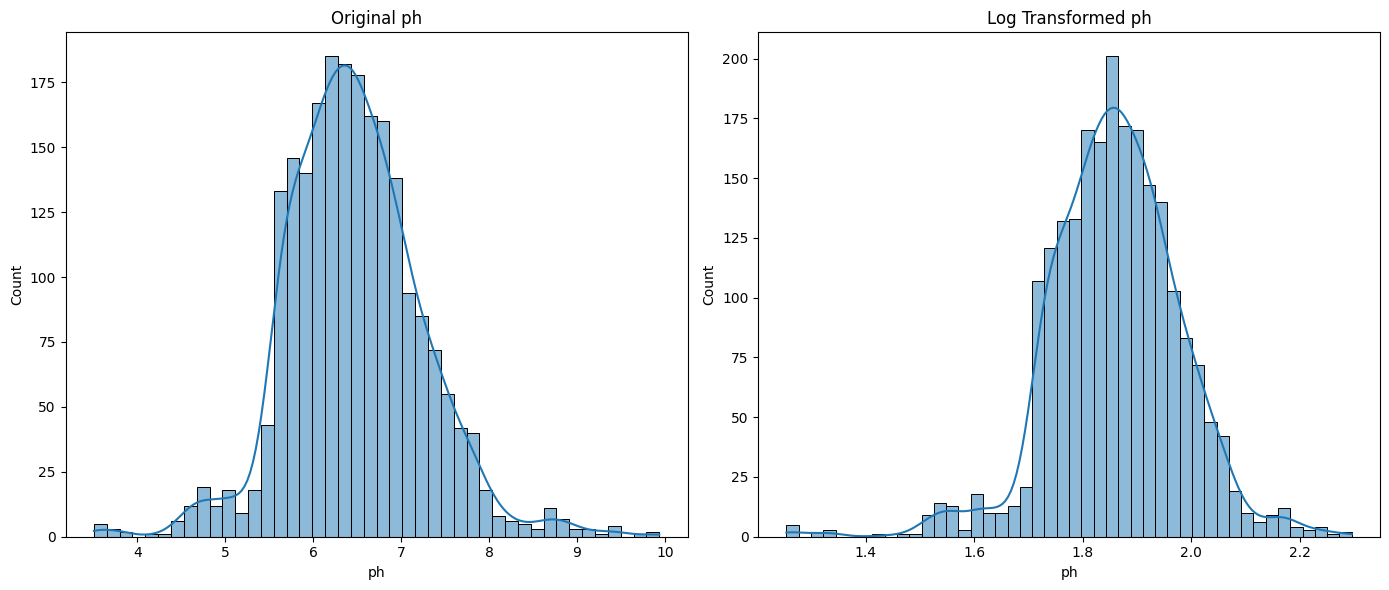

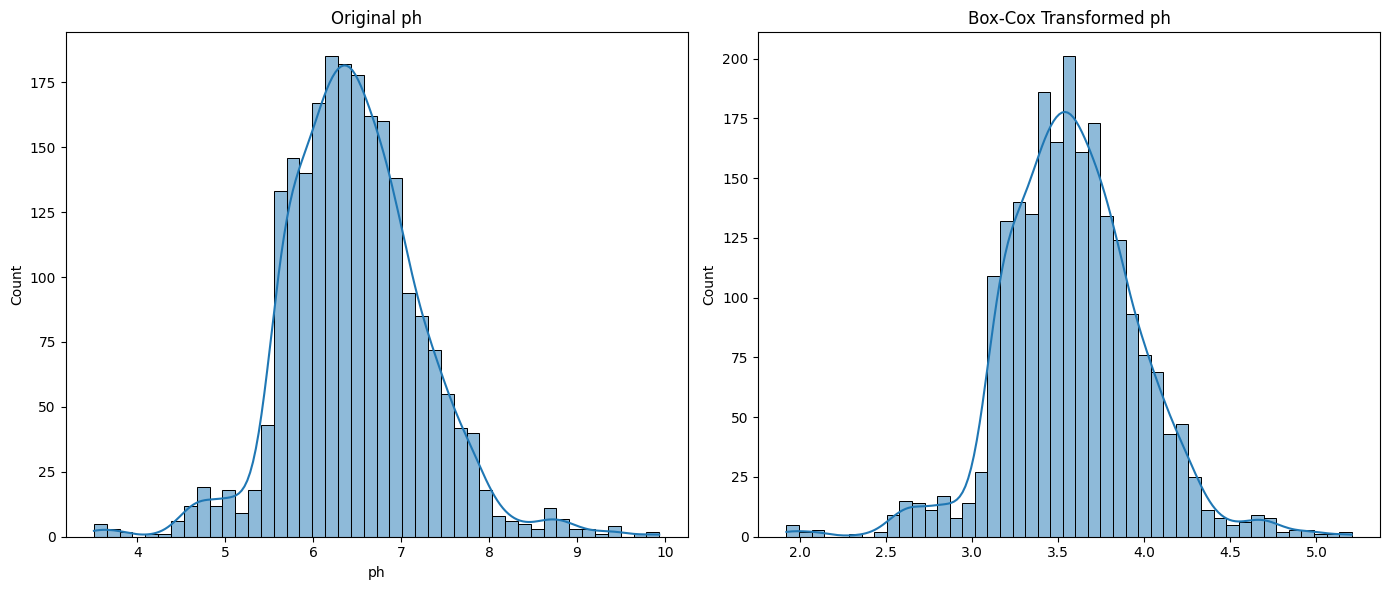

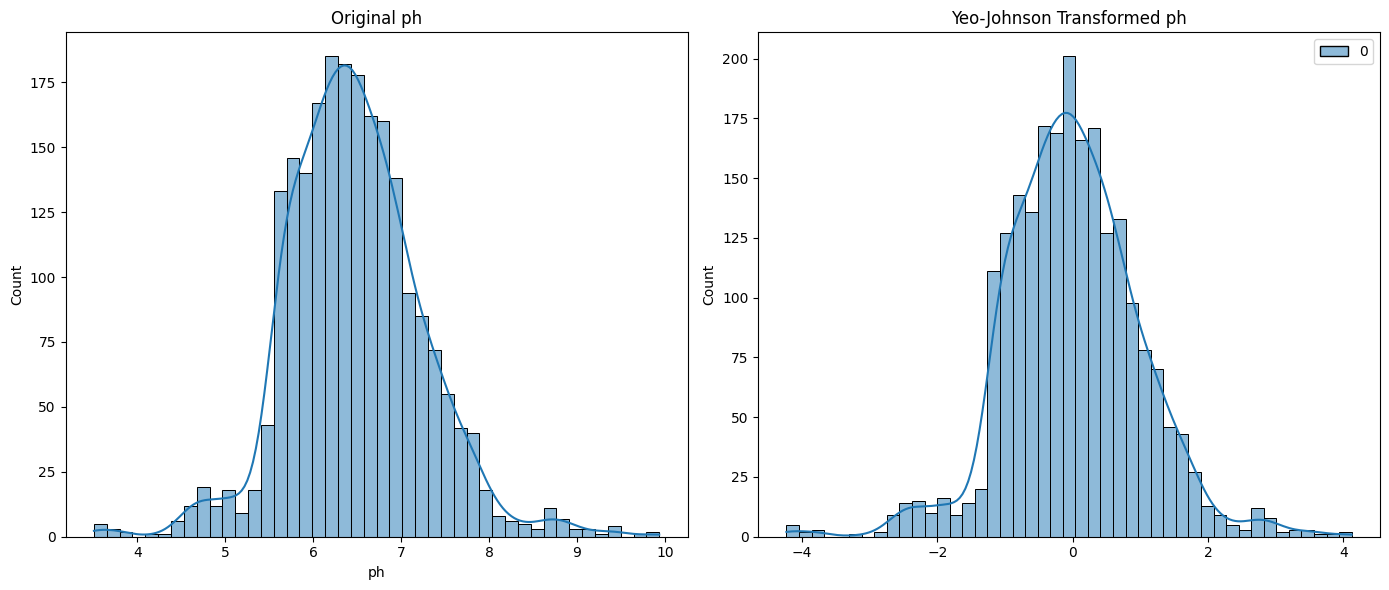

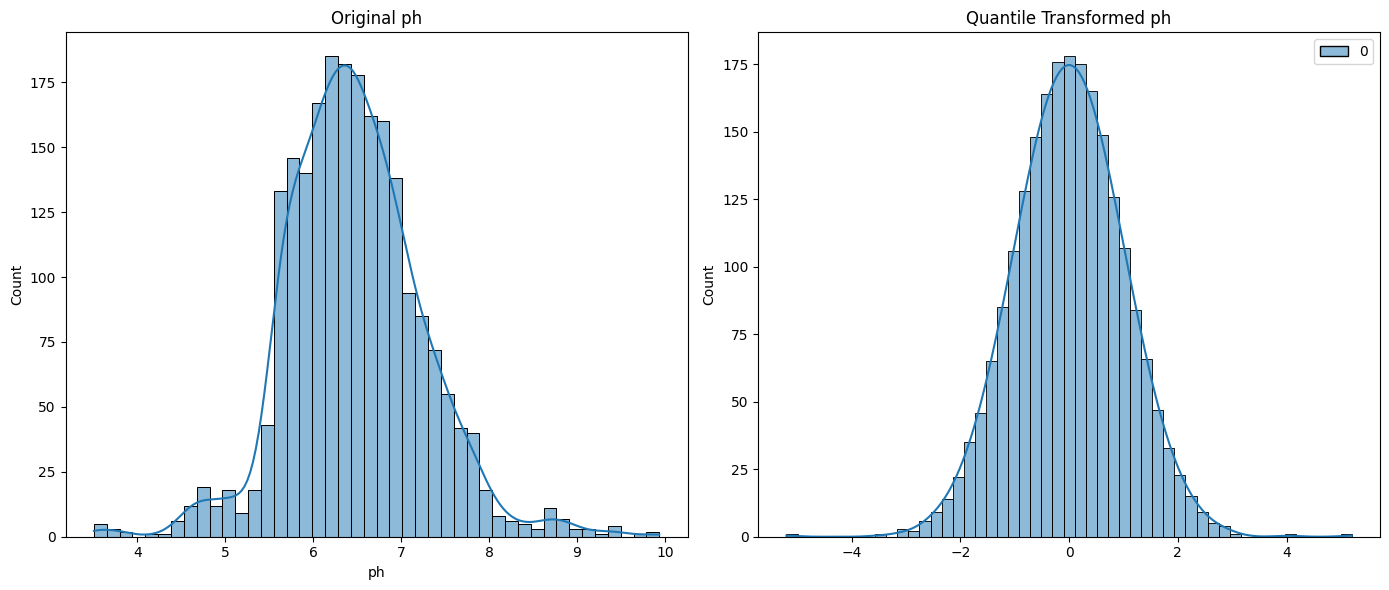

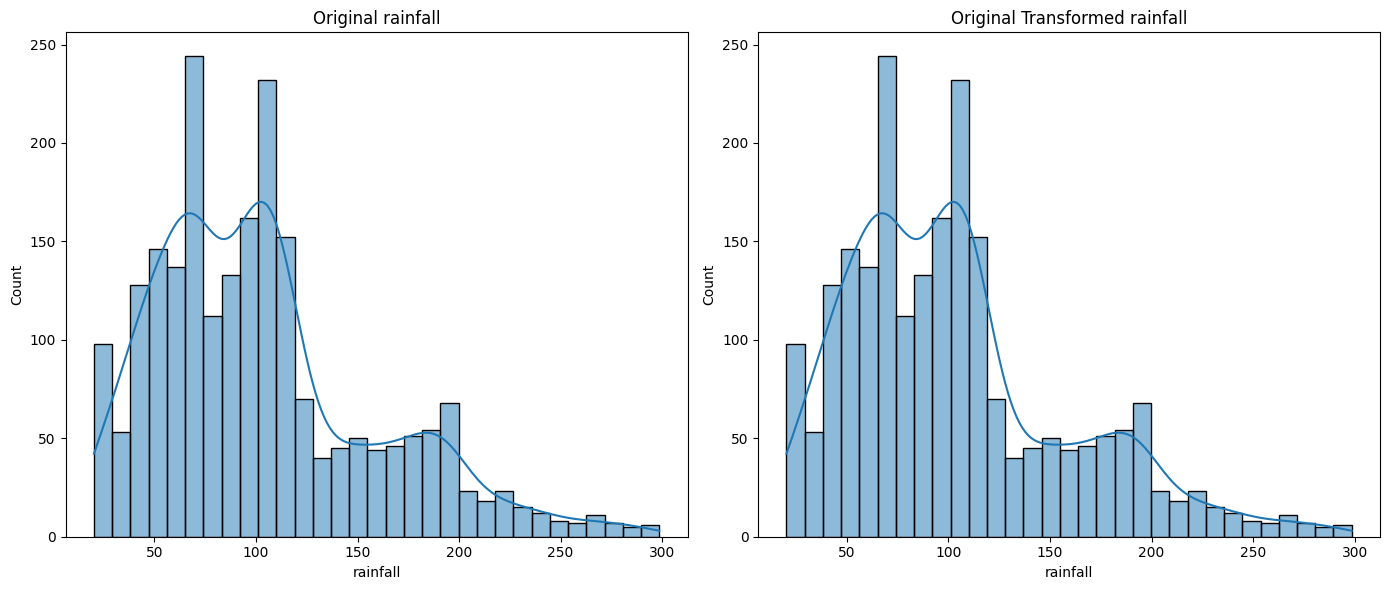

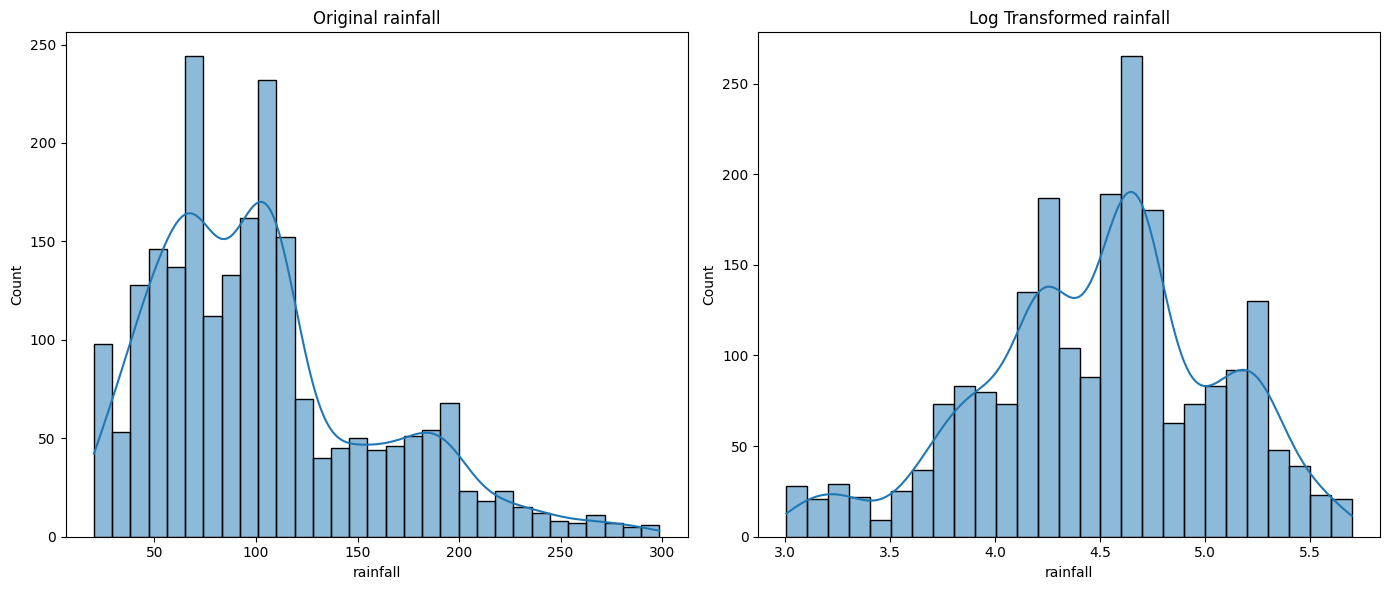

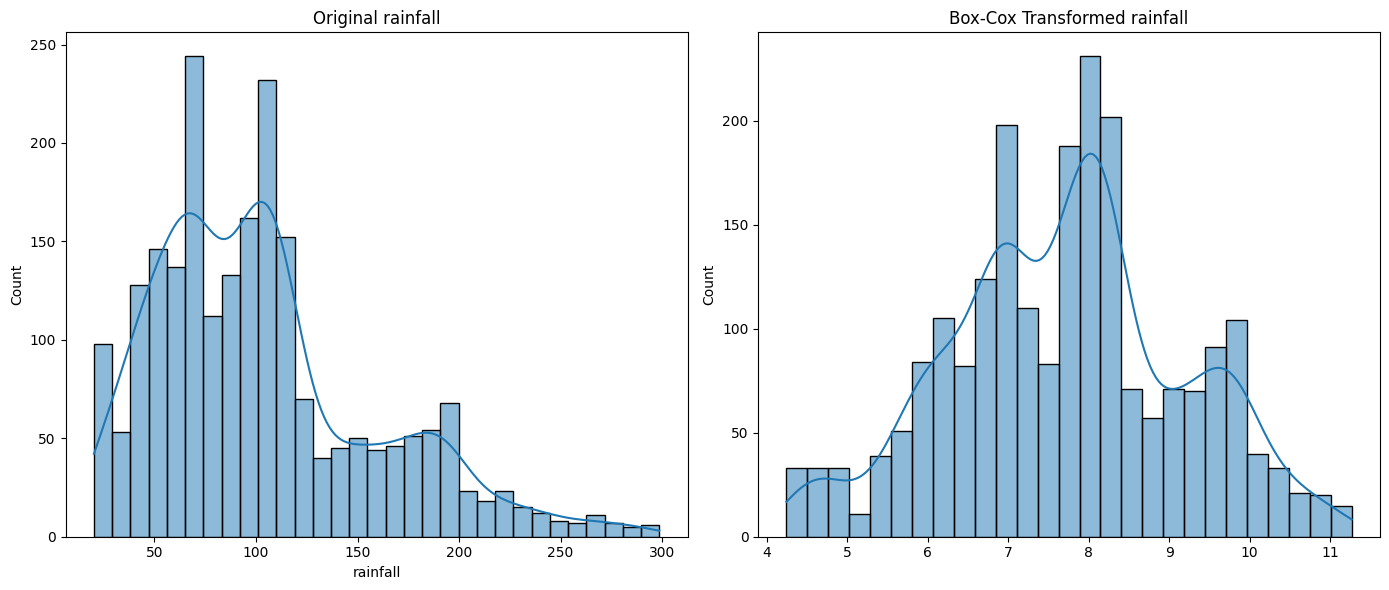

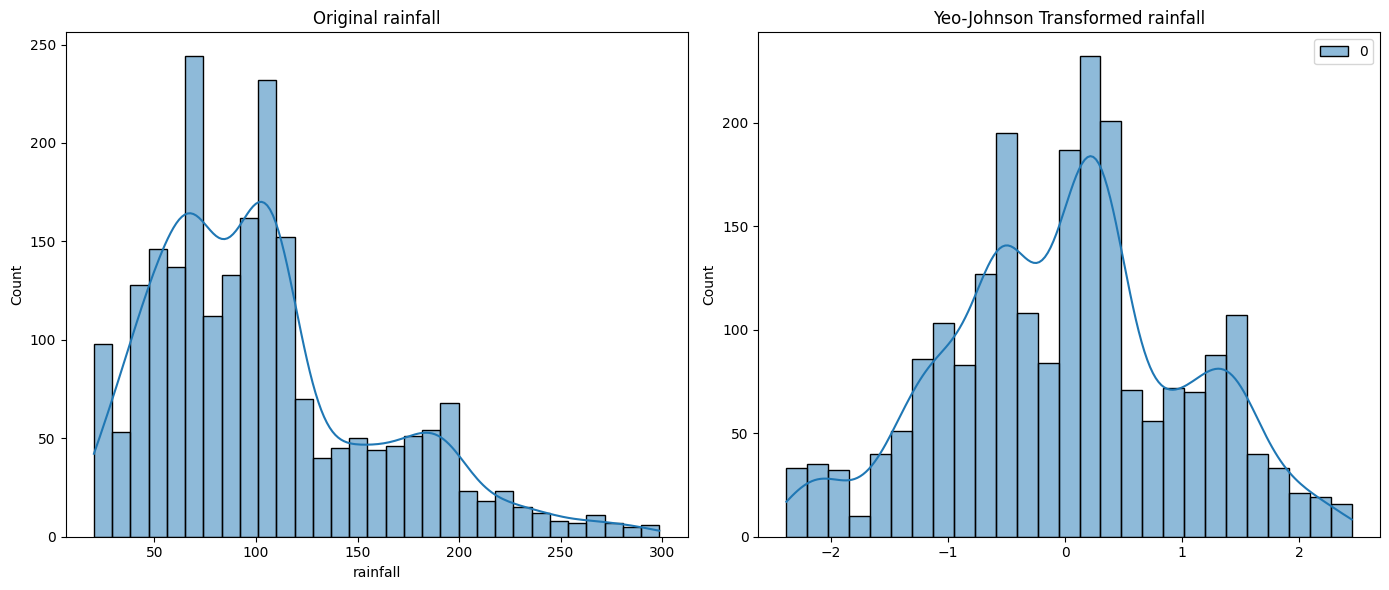

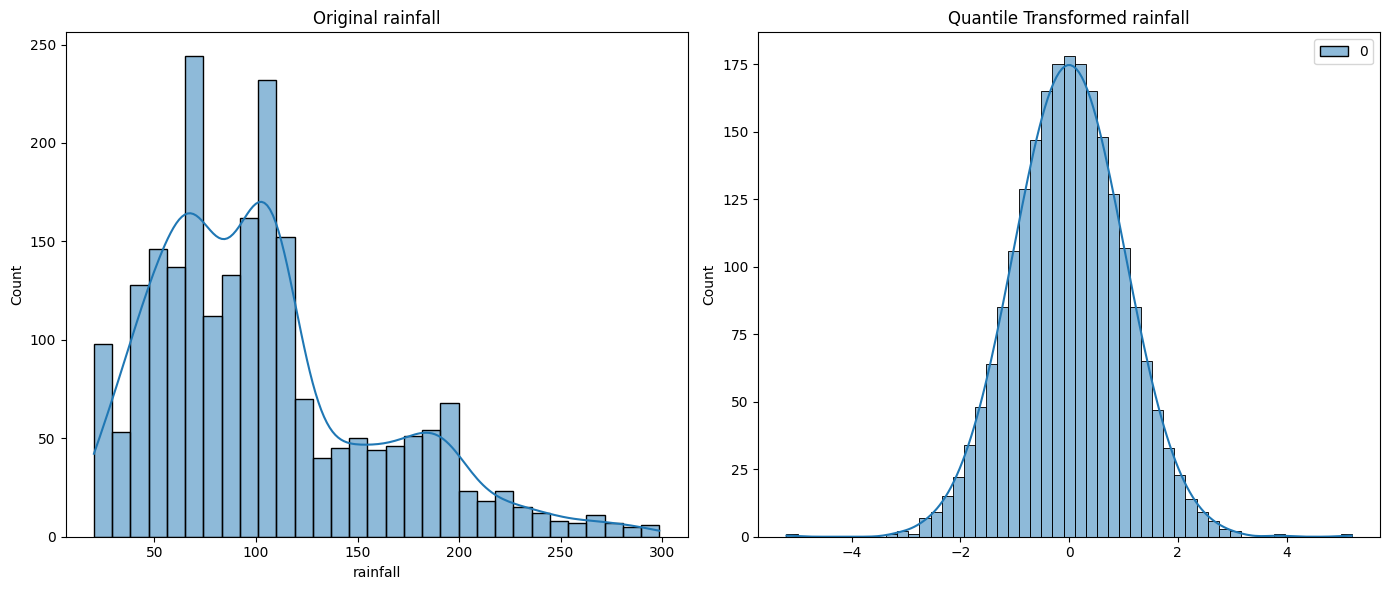

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Identify numerical columns in the dataframe (both continuous and discrete)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Separate continuous features: features with more than 10 unique values
continuous_features = [col for col in numerical_cols if df[col].nunique() > 10]

# Function to visualize original and transformed data side by side
def visualize_transformations(df, original_feature, transformed_data, transformation_name):
    # Create a subplot with 2 columns: original vs transformed
    plt.figure(figsize=(14, 6))

    # Plot original data histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[original_feature], kde=True)
    plt.title(f'Original {original_feature}')
    
    # Plot transformed data histogram
    plt.subplot(1, 2, 2)
    sns.histplot(transformed_data, kde=True)
    plt.title(f'{transformation_name} Transformed {original_feature}')
    
    plt.tight_layout()
    plt.show()

# Apply transformations to continuous features
for feature in continuous_features:
    # Original data visualization
    visualize_transformations(df, feature, df[feature], "Original")

    # Apply Log Transformation (for positive skewed data)
    if (df[feature] > 0).all():  # Log transformation is only valid for positive values
        transformed_log = np.log(df[feature])
        visualize_transformations(df, feature, transformed_log, "Log")
    
    # Apply Box-Cox Transformation (for positive values)
    if (df[feature] > 0).all():  # Box-Cox only works with positive values
        transformed_boxcox, _ = stats.boxcox(df[feature])
        visualize_transformations(df, feature, transformed_boxcox, "Box-Cox")

    # Apply Yeo-Johnson Transformation (works with both positive and negative values)
    yeo_johnson = PowerTransformer(method='yeo-johnson')
    transformed_yeo_johnson = yeo_johnson.fit_transform(df[[feature]])
    visualize_transformations(df, feature, transformed_yeo_johnson, "Yeo-Johnson")

    # Apply Quantile Transformation (maps data to normal distribution)
    quantile_transformer = QuantileTransformer(output_distribution='normal')
    transformed_quantile = quantile_transformer.fit_transform(df[[feature]])
    visualize_transformations(df, feature, transformed_quantile, "Quantile")



### Feature Engineering

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [27]:
# Create a column transformer
column_transformer = ColumnTransformer([
    ('standard_scaler', StandardScaler(), numerical_features)
])

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [29]:
# Make a pipeline
pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [31]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [35]:
# Make predictions
y_pred = pipeline.predict(X_test)
# print("Predictions:", y_pred)

In [33]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
    

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931818181818182


In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

#### Cross Validation

In [38]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(pipeline, X, y, cv=skf, scoring='accuracy')

# Print results
print("Cross-validation results: ", cv_results)

Cross-validation results:  [0.99545455 0.99318182 1.         0.99772727 0.99090909]


In [ ]:
# Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)


In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)